# 1. Introduction

---

## Domain

This project operates within the real estate and housing economics domain, with a special focus on property pricing trends in some of the most populous states in the United States. Housing prices, an important economic indicator, are influenced by diverse factors, including population density, property size, and location-specific characteristics. This study narrows its scope to 10 states, which rank among the 25 most populous U.S. states⁽¹⁾, providing a representative sample of diverse real estate markets. These markets face unique challenges such as rising population density, urbanisation, and market demand, all of which contribute to housing affordability issues.

Population density is a critical factor in housing economics, often driving property demand and, consequently, pricing in urban and suburban areas. By examining property size (land area in square feet) against housing prices, the project seeks to investigate how the dynamics of populous states influence the property size-price relationship.

## Objective

1. Building a Predictive Model: Developing a linear regression model to predict housing prices based on property size and location data, allowing for reliable price estimation.
2. Analysing Market Dynamics: Understanding how population density affects the relationship between property size and housing prices, uncovering patterns or anomalies in pricing trends across densely populated states.
3. Providing Stakeholder Insights: Delivering insights for stakeholders—homeowners, real estate investors, and policymakers—to inform investment decisions and address affordability concerns.
4. Contributing to Housing Economics: Enhancing the understanding of how property size influences price trends in densely populated areas, contributing to policymaking and strategic planning.

## Why Use Linear Regression?
Linear regression is a suitable model for this domain because:

- Direct Relationship: Housing prices and property size often exhibit a linear relationship, where larger properties tend to have higher prices. This makes linear regression an ideal starting point for modeling.
- Interpretability: Linear regression provides clear insights into how features such as property size and location influence prices, making it useful for stakeholders seeking actionable results.
- Scalability: The model can be scaled to include additional variables if required, allowing for flexibility in future analyses.
- Domain-Specific Applicability: Housing price predictions have been successfully studied using linear regression in numerous research works, demonstrating its effectiveness in addressing similar problems.

## Achievements and Contributions
The project aims to provide insights into the housing market by examining the relationship between property size and price, influenced by population density. By focusing on populous states, the study highlights areas where housing affordability is most strained, contributing to strategic decision-making for stakeholders. Furthermore, this project showcases how machine learning via linear regression, can address real estate economics challenges, establishing a methodological framework for future studies.

# 2. Dataset

---

## Dataset Description and Fitness for Purpose

The dataset used for this project, titled “12000 House Price List from 10 States of USA⁽²⁾”, is publicly available on Kaggle. It contains real estate data collected from 10 states, all of which rank within the top 25 most populous states in the U.S., aligning directly with the project’s focus on populous states.

## Dataset Origin
The data was web-scraped from Trulia⁽³⁾, a real estate website, using a combination of Selenium automation and BeautifulSoup:

- Selenium: Enabled interaction with dynamically loaded web pages to ensure the complete retrieval of property details.
- BeautifulSoup: Parsed HTML content to extract relevant information into a structured dataset.

## Structure and Data Types
The dataset contains 12,000 rows and 11 columns, making it a manageable size for preprocessing and analysis in this project. Each row represents a property listing, and the columns include the following data types:

- Numerical: price, house_size (size in square feet), bed, bath.
- Categorical: state_name, city, zip_code.
- Textual: street, broker.
- Date: date.

## Dataset Characteristics
- Missing Data: Some columns, such as price and house_size, have missing values, requiring preprocessing.
- Non-Normalised Format: The house_size column includes mixed descriptors (e.g., acreage and square feet), requiring additional cleaning.
- Rich Attributes: The dataset captures key features like location (state, city, zip code) and property characteristics (size, bedrooms, bathrooms), making it suitable for the project’s objectives.

## Fitness for Purpose
The dataset is a good fit for the project because:

1. Relevance: The focus on populous U.S. states aligns with the dataset’s geographic coverage.
2. Granularity: It includes property-specific details (e.g., price and size), supporting the study of relationships between property size and housing prices.
3. State-Specific Insights: State-specific information allows for cross-comparisons and analysis of market dynamics influenced by population density.

## Linear Regression Suitability:
1. Quantitative Features: Numerical data (e.g., price and house_size) aligns with linear regression’s requirement for continuous, quantitative variables.
2. Predictive Modeling: The dataset’s structure and attributes support predicting housing prices based on property size and location.

# 3. Data Preparation

---

The data preparation phase involves transforming the raw dataset into a structured and clean format suitable for analysis and machine learning. This process addresses missing data, ensures adherence to First Normal Form (1NF), and prepares features for the linear regression model. The following pipeline was applied:

1. Load and Store the Data: Efficiently read and store the dataset for analysis.
2. Convert to 1NF: Ensure all data is atomic and free from repeating groups or nested structures.
3. Cleaning: Address missing values, remove duplicates, and handle outliers to ensure data quality.
4. Sanitisation: Standardise, format, and align the data to maintain consistency and usability.







In [ ]:
# import necessary modules

from google.colab import files

import math, re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import skew, kurtosis
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

## 1. Load and Store

The initial dataset, provided in CSV file format, was imported into a Pandas DataFrame to allow for efficient data manipulation and processing.

In [ ]:
# load csv file into Pandas data frame (via Google Colab)
uploaded = files.upload()
filename = next(iter(uploaded))
raw_df = pd.read_csv(filename)

# check dataframe
raw_df.head()

Saving US House Price of 10 States.csv to US House Price of 10 States.csv


date                  house_size  bed bath      price broker  \
0  AUG 16, 2024  1,851 sqft (on 1.21 acres)  3bd  3bd  $440,000     NaN   
1  AUG 16, 2024  1,248 sqft (on 0.26 acres)  4bd  4bd  $142,500     NaN   
2  AUG 16, 2024                  1,200 sqft  3bd  3bd  $279,000     NaN   
3  AUG 16, 2024  1,216 sqft (on 0.52 acres)  2bd  2bd  $175,000     NaN   
4  AUG 16, 2024  2,471 sqft (on 0.55 acres)  4bd  4bd  $567,900     NaN   

                street          city state_name  zip_code  
0      8311 Brandon Rd   Panama City    Florida     32404  
1   1413 Louisiana Ave    Lynn Haven    Florida     32444  
2       1303 Fairy Ave   Panama City    Florida     32401  
3     4713 Colorado St   Panama City    Florida     32404  
4  3303 S  Harbour Cir   Panama City    Florida     32405

### Add Longitude and Latitude Data

Geo-spatial coordinates (longitude and latitude) were extracted for each property listing using the Google Maps API, based on the property's street address, city, and state. These coordinates provide precise locational data, which will later be used during feature engineering to enhance the evaluation model's performance and accuracy by incorporating spatial context into the analysis.

In [ ]:
# new columns to hold both longitude and latitude values
# df['longitude'] = 0.0
# df['latitude'] = 0.0

In [ ]:
# import requests
# from urllib.parse import quote_plus

# function to convert address to longitude and latitude

# def address_convert(street, city, state_name):
#     # Google API key
#     api_key = ''

#     # address to convert to coordinates
#     address = street + " " + city + " " + state_name

#     # URL encode the address using urllib.parse
#     address_encoded = quote_plus(address)

#     # Google Maps Geocoding API URL
#     url = f'https://maps.googleapis.com/maps/api/geocode/json?address={address_encoded}&key={api_key}'

#     # send a request to the Google Maps Geocoding API
#     response = requests.get(url)

#     # parse the JSON response
#     data = response.json()

#     # extract latitude and longitude
#     if data['status'] == 'OK':
#         latitude = data['results'][0]['geometry']['location']['lat']
#         longitude = data['results'][0]['geometry']['location']['lng']
#         return latitude, longitude
#
#     else:
#         print('Geocoding failed:', data.get('status'))
#         if data.get('results'):
#             print(f"Could not find the location for {address}.")
#         else:
#             print('No results returned. Double-check the address format.')

In [ ]:
# import time  # to manage request rate limits

# # loop through each row in the DataFrame
# for i in range(len(df)):

#     if df.loc[i, 'latitude'] == 0 and df.loc[i, 'longitude'] == 0:
#       # get the address components
#       street = df.loc[i, 'street']
#       city = df.loc[i, 'city']
#       state_name = df.loc[i, 'state_name']

#       # call the address_convert function to get latitude and longitude
#       latitude, longitude = address_convert(street, city, state_name)

#       # if geocoding was successful, update the DataFrame
#       if latitude is not None and longitude is not None:
#           df.loc[i, 'latitude'] = latitude
#           df.loc[i, 'longitude'] = longitude

#       # time delay to avoid hitting the API rate limit
#       # sleep for 100ms between requests
#       time.sleep(0.1)

# # save the DataFrame as a CSV
# df.to_csv('us_housing_with_loc.csv', index=False)
# # download the CSV file
# files.download('us_housing_with_loc.csv')

In [ ]:
# directly use new CSV file for future use cases
# load csv file into Pandas data frame (via Google Colab)
uploaded = files.upload()
filename = next(iter(uploaded))
raw_df_with_loc = pd.read_csv(filename)

# check dataframe
raw_df_with_loc.head()

Saving use_housing_with_loc.csv to use_housing_with_loc.csv


date                  house_size  bed bath      price broker  \
0  AUG 16, 2024  1,851 sqft (on 1.21 acres)  3bd  3bd  $440,000     NaN   
1  AUG 16, 2024  1,248 sqft (on 0.26 acres)  4bd  4bd  $142,500     NaN   
2  AUG 16, 2024                  1,200 sqft  3bd  3bd  $279,000     NaN   
3  AUG 16, 2024  1,216 sqft (on 0.52 acres)  2bd  2bd  $175,000     NaN   
4  AUG 16, 2024  2,471 sqft (on 0.55 acres)  4bd  4bd  $567,900     NaN   

                street          city state_name  zip_code  longitude  \
0      8311 Brandon Rd   Panama City    Florida     32404 -85.506380   
1   1413 Louisiana Ave    Lynn Haven    Florida     32444 -85.638314   
2       1303 Fairy Ave   Panama City    Florida     32401 -85.685035   
3     4713 Colorado St   Panama City    Florida     32404 -85.603126   
4  3303 S  Harbour Cir   Panama City    Florida     32405 -85.701275   

    latitude  
0  30.251507  
1  30.236491  
2  30.172379  
3  30.151174  
4  30.206182

## 2. Converting to 1NF

The First Normal Form (1NF) ensures that the table contains atomic values and no repeating groups. In the dataset, the house_size column violated this rule by combining multiple pieces of information into a single cell. Specifically, the house_size column mixed two distinct attributes: house size and land size, making the values non-atomic. The entries in the column were either:

1. House size only: "1,851 sqft"
2. House size with additional land size: "1,851 sqft (on 1.21 acres)"

To resolve this issue and ensure compliance with 1NF, two new columns were created:

1. house_size_clean: stores only the house size in square feet.
2. property_size: stores the total land size in square feet. If the land size is not provided, this column stores the house size.

In [ ]:
df_normalised = raw_df_with_loc.copy()

In [ ]:
# new columns to hold both house and property size values
df_normalised['house_size_clean'] = 0.0
df_normalised['property_size'] = 0.0

# column to view if house comes with additional land
df_normalised['house_with_land'] = False

# check that the columns have been successfully added
print(df_normalised.columns)

Index(['date', 'house_size', 'bed', 'bath', 'price', 'broker', 'street',
       'city', 'state_name', 'zip_code', 'longitude', 'latitude',
       'house_size_clean', 'property_size', 'house_with_land'],
      dtype='object')


The clean_size function was developed to process the house_size column. This function:

1. Takes the string from the house_size column.
2. Identifies if both house and land size are included in the string.
  - If only the house size is present, house_with_land is set to False.
  - If both house and land size are present, house_with_land is set to True.
3. Extracts the numeric values for house size and total property size (if applicable).
4. Returns two values: one for the house size and one for the property size.

This transformation ensures the dataset adheres to 1NF, with atomic values that can be more easily analysed and modeled.

In [ ]:
# function takes house_size value and extracts house and property size
def clean_size(value):
    house_size = 0.0
    property_size_sqft = 0.0

    try:
        # check if the value is NaN
        if pd.isna(value):

            # return 0 for both house_size and property_size_sqft for NaN
            return 0.0, 0.0

        # regular expression to capture both house size (in sqft) and property size (in acres)
        match = re.search(r'(\d+(?:,\d{3})*)\s*sqft(?:.*on\s*(\d+(\.\d+)?)\s*acres)?', str(value))

        if match:
            # extract house size (remove commas and convert to integer)
            house_size = int(match.group(1).replace(',', ''))

            # check if there's a property size in acres
            if match.group(2):

                # extract property size in acres
                property_size_acres = float(match.group(2))

                # convert property size to square feet (1 acre = 43,560 sqft)
                property_size_sqft = property_size_acres * 43560

            else:
                # if no acres information, set property_size_sqft to house_size
                property_size_sqft = house_size

         # return both house size and property size in sqft
        return house_size, property_size_sqft

    except Exception as e:
        print(f"Error processing value: {value}. Error: {e}")
        # default values for errors
        return 0.0, 0.0

In [ ]:
# call function to clean house_size column
for i in range(len(df_normalised)):
      house_size, property_size = clean_size(df_normalised.loc[i, 'house_size'])
      df_normalised.loc[i, 'house_size_clean'] = house_size
      df_normalised.loc[i, 'property_size'] = property_size

      if house_size != property_size:
        df_normalised.loc[i, 'house_with_land'] = True

# check that the columns have the correct values
df_normalised.head()

date                  house_size  bed bath      price broker  \
0  AUG 16, 2024  1,851 sqft (on 1.21 acres)  3bd  3bd  $440,000     NaN   
1  AUG 16, 2024  1,248 sqft (on 0.26 acres)  4bd  4bd  $142,500     NaN   
2  AUG 16, 2024                  1,200 sqft  3bd  3bd  $279,000     NaN   
3  AUG 16, 2024  1,216 sqft (on 0.52 acres)  2bd  2bd  $175,000     NaN   
4  AUG 16, 2024  2,471 sqft (on 0.55 acres)  4bd  4bd  $567,900     NaN   

                street          city state_name  zip_code  longitude  \
0      8311 Brandon Rd   Panama City    Florida     32404 -85.506380   
1   1413 Louisiana Ave    Lynn Haven    Florida     32444 -85.638314   
2       1303 Fairy Ave   Panama City    Florida     32401 -85.685035   
3     4713 Colorado St   Panama City    Florida     32404 -85.603126   
4  3303 S  Harbour Cir   Panama City    Florida     32405 -85.701275   

    latitude  house_size_clean  property_size  house_with_land  
0  30.251507            1851.0        52707.6             True  
1  30.236491            1248.0        11325.6             True  
2  30.172379            1200.0         1200.0            False  
3  30.151174            1216.0        22651.2             True  
4  30.206182            2471.0        23958.0             True

In [ ]:
# drop the house_size columns
df_normalised.drop(columns=['house_size'], inplace=True)

# rename house_size_clean column to house_size
df_normalised = df_normalised.rename(columns={'house_size_clean': 'house_size'})
print(df_normalised.columns)

Index(['date', 'bed', 'bath', 'price', 'broker', 'street', 'city',
       'state_name', 'zip_code', 'longitude', 'latitude', 'house_size',
       'property_size', 'house_with_land'],
      dtype='object')


## 3. Cleaning

In the data cleaning phase, we focus on addressing duplicate rows and rows with missing data to ensure the dataset is accurate and reliable for analysis.

### i. Remove Unnecessary Columns

In this step, we will remove columns that are irrelevant for the analysis to make the dataset more focused on relevant features. The following columns are removed:

1. "date": This column is irrelevant for this project, as the analysis focuses on property features and pricing.

2. "bath": There is an issue with this column where values from the "bed" (bedroom) column are incorrectly replicated into the "bath" (bathroom) column. Since the dataset contains accurate data for bedrooms, and the bathroom column is inconsistent, this column will be removed.

3. "broker": This column does not contribute to the prediction of housing prices, as it does not directly affect property valuation. Therefore, it will be discarded.

In [ ]:
df_clean = df_normalised.copy()

In [ ]:
df_clean = df_clean.drop(columns=['date', 'bath', 'broker'])
print(df_clean.columns)

Index(['bed', 'price', 'street', 'city', 'state_name', 'zip_code', 'longitude',
       'latitude', 'house_size', 'property_size', 'house_with_land'],
      dtype='object')


### ii. Check and Handle Duplicate Data

Duplicates are identified by comparing the longitude and latitude columns, which provide unique identifiers for each property. Any duplicate rows are removed to avoid overrepresentation, ensuring the dataset contains only distinct entries. This step helps prevent biases and improves model accuracy.

In [ ]:
# filter rows with unique longitude and latitude combinations
original_df_size = len(df_clean)
df_clean = df_clean.drop_duplicates(subset=['longitude', 'latitude'])

# reset the index for the resulting DataFrame
df_clean.reset_index(drop=True, inplace=True)

# display the cleaned DataFrame
print(f"Original rows: {original_df_size}")
print(f"Rows after removing duplicates: {len(df_clean)}")

Original rows: 12075
Rows after removing duplicates: 11066


### iii. Handle Missing Values

In this step, we examine the dataset for missing values, as incomplete data can negatively impact both the analysis and the model’s performance. The focus is on the "price" and "house_size" columns, which are critical for predicting property prices.

1. Price and House Size:
  - If both price and house_size_clean are missing in the same row, that entry is removed, as both features are essential for prediction.
  - If only one of these columns has missing values, we check how many such entries exist. If the number of missing values is small relative to the dataset size, we drop those rows.

2. City, street name, state: These columns are not checked for missing values, as geo-spatial coordinates were successfully extracted during the conversion process for all entries, indicating no issues with missing data.

By removing rows with missing price and house_size values and imputing others as necessary, the dataset remains complete and reliable for model training.


In [ ]:
before_dropping = len(df_clean)

# drop rows where both 'price' and 'house_size' are NaN
df_clean = df_clean.dropna(subset=['price', 'house_size'], how='all')

# print the size of the original and filtered dataframe
print('Original DF Size:', before_dropping, 'Filtered DF Size:', len(df_clean))

Original DF Size: 11066 Filtered DF Size: 11066


To do this, we first examine the dataset for each state to assess the proportion of properties with both price and size values versus those with either price or size missing. This check is crucial for ensuring that missing values are not overrepresented and that the imputation reflects the overall distribution of available data.

The following steps are taken:

1. Calculate the Ratio: For each state, we calculate the ratio of properties with complete information (both price and size) versus properties where either the price or house size is missing.
2. Verify Representation: By analysing this ratio, we ensure that missing values are not disproportionately affecting the dataset, and we can make informed decisions about the imputation strategy.

In [ ]:
# check entries with either price or area with NaN value
complete_data_count = df_clean.dropna(subset=['price', 'property_size']).groupby('state_name').size()
missing_data_count = df_clean[df_clean['price'].isna() | df_clean['property_size'].isna()].groupby('state_name').size()

# combine the counts into a single DataFrame for easier inspection
missing_data_ratio = pd.DataFrame({'complete_data': complete_data_count,
                                   'missing_data': missing_data_count
                                   })

missing_data_ratio

complete_data  missing_data
state_name                                 
AL                       80.0           NaN
AZ                       68.0           NaN
Alabama                 902.0          17.0
Arizona                 985.0           NaN
CA                      905.0           NaN
California             1192.0           NaN
FL                      196.0           NaN
Florida                 824.0           NaN
IL                       76.0           NaN
Illinois                901.0           NaN
LA                        NaN         964.0
NY                       58.0           NaN
New York                948.0           NaN
North Carolina          995.0           NaN
South Carolina          964.0           NaN
WA                      988.0           3.0

Based on the above analysis, the following actions are taken regarding missing data:

- Alabama: 17 rows have incomplete data in either the price or house_size columns. These rows will be dropped.
- Washington: 3 rows have incomplete data in either the price or house_size columns. These rows will also be dropped.
- Louisiana: All rows have missing data for either price and house_size. Since these columns are essential for prediction, all rows from Louisiana will be removed from the dataset.

In [ ]:
# drop all properties based in Louisiana
df_clean = df_clean[df_clean['state_name'] != 'Louisiana']

# drop rows where 'price' or 'house_size_clean' is NaN or 0
df_clean = df_clean[
    (df_clean['price'].notna()) & (df_clean['price'] != 0) &
    (df_clean['property_size'].notna()) & (df_clean['property_size'] != 0)
]

In [ ]:
# check entries with either price or area with Null value
complete_data_count = df_clean.dropna(subset=['price', 'property_size']).groupby('state_name').size()
missing_data_count = df_clean[df_clean['price'].isna() | df_clean['property_size'].isna()].groupby('state_name').size()

# combine the counts into a single DataFrame for easier inspection
missing_data_ratio = pd.DataFrame({'complete_data': complete_data_count,
                                   'missing_data': missing_data_count
                                   })

missing_data_ratio

complete_data  missing_data
state_name                                 
AL                         76           NaN
AZ                         65           NaN
Alabama                   812           NaN
Arizona                   944           NaN
CA                        897           NaN
California               1149           NaN
FL                        184           NaN
Florida                   724           NaN
IL                         70           NaN
Illinois                  821           NaN
NY                         57           NaN
New York                  764           NaN
North Carolina            919           NaN
South Carolina            877           NaN
WA                        938           NaN

## 4. Sanitisation

To ensure the dataset is clean and uniform, the following key sanitisation tasks were performed:
1. Standardising state names
2. Extracting integer value from price column
3. Sanitising inputs of columns
4. Removing unrealistic data

### i. Standardising State Names

The state_name column was standardised to ensure consistency across the dataset, as some entries contained state abbreviations. A mapping was created to convert all abbreviations into their full and correct names. This process ensures that the dataset can be accurately grouped and analysed by state, eliminating any inconsistencies.

In [ ]:
df_sanitised = df_clean.copy()

In [ ]:
# check for all variations of state names
df_sanitised['state_name'].unique()

array(['Florida', 'FL', 'Alabama', 'South Carolina', 'California',
       'Illinois', 'New York', 'Arizona', 'North Carolina', 'WA', 'CA',
       'NY', 'IL', 'AZ', 'AL'], dtype=object)

In [ ]:
state_mapping = {
    'AL': 'Alabama',
    'AZ': 'Arizona',
    'CA': 'California',
    'FL': 'Florida',
    'IL': 'Illinois',
    'NY': 'New York',
    'NC': 'North Carolina',
    'SC': 'South Carolina',
    'WA': 'Washington'
}

df_sanitised['state_name'] = df_sanitised['state_name'].replace(state_mapping)

# check the mapping
df_sanitised['state_name'].unique()

array(['Florida', 'Alabama', 'South Carolina', 'California', 'Illinois',
       'New York', 'Arizona', 'North Carolina', 'Washington'],
      dtype=object)

### ii. Extracting Integer Value from the Price Column
  
The price column initially contains string values with dollar signs and commas (e.g., "$450,000"). These non-numeric characters were removed to convert the prices into a numeric format suitable for analysis. By extracting only the numeric portion and converting it to a float, the data became consistent and usable for regression analysis and other statistical modeling.

In [ ]:
# function which takes price column values and converts to int
def clean_price(value):
    try:
        # ensure the value is a string
        value = str(value)

        # remove commas and dollar signs
        value = value.replace(',', '').replace('$', '')

        # convert to int and return
        return int(value)

    except ValueError:
        # return 0 if conversion fails
        return 0

In [ ]:
# apply clean_price function to the 'price' column and store the result in 'price_clean'
df_sanitised['price_clean'] = df_sanitised['price'].apply(clean_price)
df_sanitised.head()

bed      price               street          city state_name  zip_code  \
0  3bd  $440,000       8311 Brandon Rd   Panama City    Florida     32404   
1  4bd  $142,500    1413 Louisiana Ave    Lynn Haven    Florida     32444   
2  3bd  $279,000        1303 Fairy Ave   Panama City    Florida     32401   
3  2bd  $175,000      4713 Colorado St   Panama City    Florida     32404   
4  4bd  $567,900   3303 S  Harbour Cir   Panama City    Florida     32405   

   longitude   latitude  house_size  property_size  house_with_land  \
0 -85.506380  30.251507      1851.0        52707.6             True   
1 -85.638314  30.236491      1248.0        11325.6             True   
2 -85.685035  30.172379      1200.0         1200.0            False   
3 -85.603126  30.151174      1216.0        22651.2             True   
4 -85.701275  30.206182      2471.0        23958.0             True   

   price_clean  
0       440000  
1       142500  
2       279000  
3       175000  
4       567900

In [ ]:
df_sanitised = df_sanitised.drop('price', axis=1)
print(df_sanitised.columns)

Index(['bed', 'street', 'city', 'state_name', 'zip_code', 'longitude',
       'latitude', 'house_size', 'property_size', 'house_with_land',
       'price_clean'],
      dtype='object')


### iii. Sanitising inputs of columns

1. The 'bed' column was initially stored as an object due to values being formatted as "3bd" (e.g., "3bd" for 3 bedrooms). We converted these values into integers by extracting the numeric part from the string.
2. The 'street' and 'city' columns were cleaned using the .strip() function to remove any leading or trailing spaces or irrelevant characters, ensuring uniformity across the dataset.

In [ ]:
# replace 'bd' and convert the column to integers
try:
    df_sanitised['bed'] = df_sanitised['bed'].replace('bd', '', regex=True)

except ValueError as e:
    print(f"Error converting 'bed' column: {e}")

Error converting 'bed' column: invalid literal for int() with base 10: 'Studio'


Upon sanitising the 'bed' column, we identified that it contained a "Studio" category. Since a studio apartment is typically considered as having one bedroom, we replaced the "Studio" entries with the value 1 to maintain consistency and numerical integrity in the dataset. This ensures that all values in the 'bed' column are numeric, suitable for further analysis and modeling.

In [ ]:
df_sanitised[df_sanitised['bed'] == 'Studio']

bed                       street             city      state_name  \
610    Studio                 125 Debra Dr       Prattville         Alabama   
1911   Studio  1501 S Ocean Blvd. UNIT 901     Myrtle Beach  South Carolina   
2121   Studio          708 E  Roseburg Ave          Modesto      California   
2685   Studio           36389 N  Traer Ter           Gurnee        Illinois   
2790   Studio             525 Larkdale Row         Wauconda        Illinois   
...       ...                          ...              ...             ...   
10045  Studio              3458 Gilmer Ave       Montgomery         Alabama   
10081  Studio      329 Connecticut St #107        Hollywood         Florida   
10133  Studio        220 Atlantic Ave #213       Santa Cruz      California   
10651  Studio       999 N  Doheny Dr #1111   West Hollywood      California   
10786  Studio         8 Commodore Dr #C455       Emeryville      California   

       zip_code   longitude   latitude  house_size  property_size  \
610       36066  -86.427956  32.447584      2178.0         2178.0   
1911      29577  -78.900940  33.673275       360.0          360.0   
2121      95350 -120.984468  37.659814      2432.0        10890.0   
2685      60031  -87.993410  42.391179      1536.0         1536.0   
2790      60084  -88.155859  42.266962      1040.0         1040.0   
...         ...         ...        ...         ...            ...   
10045     36105  -86.303560  32.342251      2310.0        12196.8   
10081     33019  -80.115836  26.022703       260.0          260.0   
10133     95062 -122.006541  36.964534       451.0          451.0   
10651     90069 -118.390162  34.089590       647.0          647.0   
10786     94608 -122.304668  37.839044       470.0          470.0   

       house_with_land  price_clean  
610              False       274900  
1911             False        98000  
2121              True       700000  
2685             False       182500  
2790             False       156000  
...                ...          ...  
10045             True       101000  
10081            False       220000  
10133            False       580000  
10651            False       795000  
10786            False       330000  

[80 rows x 11 columns]

In [ ]:
df_sanitised['bed'] = df_sanitised['bed'].replace('Studio', 1)

In [ ]:
df_sanitised['bed'].unique()

array(['3', '4', '2', '5', '1', '9', '6', '8', 1, '7', '16', '12', '14',
       '21', nan, '15', '10', '11', '13'], dtype=object)

In [ ]:
df_sanitised = df_sanitised.dropna(subset=['bed'])

In [ ]:
df_sanitised['bed'] = df_sanitised['bed'].astype(int)

In [ ]:
# perform .strip on street and city column
df_sanitised['street'] = df_sanitised['street'].str.strip()
df_sanitised['city'] = df_sanitised['city'].str.strip()

In [ ]:
for col in df_sanitised.columns:
   print(col, df_sanitised[col].dtype)

bed int64
street object
city object
state_name object
zip_code int64
longitude float64
latitude float64
house_size float64
property_size float64
house_with_land bool
price_clean int64


### iv. Removing Unrealistic Data

To ensure the dataset is accurate and logical, a logic check was performed on the price_clean and house_size columns. The checks are as follows:

1. price_clean: Any property with a price that is too low or unusually high is considered unrealistic. These outliers are removed to ensure the model is not influenced by anomalous pricing data. To identify and remove unrealistic pricing data, we checked for outliers by examining the lowest and highest prices across the dataset.

2. house_size: Similarly, properties with a house size that is too small or unusually large are flagged as unrealistic and removed from the dataset by examining the lowest and highest sizes across the dataset.

The property_size column was excluded from this check, as it combines land size and house size, and the land size may include different types of land, making it less suitable for this specific logic check. This process ensures that only realistic and meaningful data is used in the model for more accurate predictions.

In [ ]:
# check the range of house pricings

price_list = list(df_sanitised['price_clean'].unique())
price_list.sort()

# lowest 10 price listings
print(price_list[0:20])

# highest 10 price listings
print(price_list[len(price_list)-20:len(price_list)])

[1, 10, 600, 2615, 2700, 5000, 5200, 5300, 13000, 14000, 16000, 18000, 23000, 23900, 24000, 24950, 25000, 28000, 29000, 30000]
[6200000, 6250000, 6287874, 6337500, 6600000, 6700000, 6935000, 7800000, 7900000, 8500000, 8525000, 9628000, 10800000, 11500000, 12750000, 13000000, 16000000, 32388888, 160000000, 178000000]


In [ ]:
df_sanitised = df_sanitised[df_sanitised['price_clean'] >= 10000]
df_sanitised = df_sanitised[df_sanitised['price_clean'] <= 15000000]

In [ ]:
# check the range of house sizes

size_list = list(df_sanitised['house_size'].unique())
size_list.sort()

# lowest 10 house sizes
print(size_list[0:20])

# highest 10 house sizes
print(size_list[len(size_list)-20:len(size_list)])

[1.0, 120.0, 260.0, 290.0, 309.0, 330.0, 360.0, 373.0, 384.0, 409.0, 412.0, 432.0, 440.0, 441.0, 450.0, 451.0, 462.0, 470.0, 475.0, 480.0]
[7650.0, 7666.0, 7746.0, 7798.0, 7921.0, 7948.0, 7994.0, 8130.0, 8485.0, 8567.0, 8704.0, 8754.0, 9415.0, 10031.0, 10263.0, 10393.0, 14549.0, 20183.0, 194030.0, 247000.0]


In [ ]:
df_sanitised = df_sanitised[df_sanitised['house_size'] >= 300]
df_sanitised = df_sanitised[df_sanitised['house_size'] <= 15000]

In [ ]:
# for feature engineering
df_sanitised['price_per_sqft'] = df_sanitised['price_clean'] / df_sanitised['house_size']

In [ ]:
df_sanitised.head()

bed               street         city state_name  zip_code  longitude  \
0    3      8311 Brandon Rd  Panama City    Florida     32404 -85.506380   
1    4   1413 Louisiana Ave   Lynn Haven    Florida     32444 -85.638314   
2    3       1303 Fairy Ave  Panama City    Florida     32401 -85.685035   
3    2     4713 Colorado St  Panama City    Florida     32404 -85.603126   
4    4  3303 S  Harbour Cir  Panama City    Florida     32405 -85.701275   

    latitude  house_size  property_size  house_with_land  price_clean  \
0  30.251507      1851.0        52707.6             True       440000   
1  30.236491      1248.0        11325.6             True       142500   
2  30.172379      1200.0         1200.0            False       279000   
3  30.151174      1216.0        22651.2             True       175000   
4  30.206182      2471.0        23958.0             True       567900   

   price_per_sqft  
0      237.709346  
1      114.182692  
2      232.500000  
3      143.914474  
4      229.825981

# 4. Statistical Analysis & Normalisation

In this section, we analyse the key numerical variables from the dataset to understand their distributions and central tendencies, as well as to identify any patterns of spread. These insights will help us decide if any transformations or additional steps are necessary. The analysis involves examining the following:

1. Measure of Central Tendency
2. Measure of Spread
3. Measure of Skewness

## i. Measures of Central Tendency
  
We analysed the following continuous variables: price, house size, property size, longitude, latitude, and price per sqft to ensure that the data values are as expected and to determine if any further transformations are needed before performing linear regression.

Observations (based on below results):
- price_clean: The mean is higher than the median indicating a right skew (presence of high-value outliers, e.g., luxury properties). The mode being lower than the mean also supports this, as most properties likely fall in the mid-range price bracket.

- house_size: The mean is higher than the median, indicating a right skew, with larger properties having a disproportionate effect on the average size.

- property_size: The mean is significantly higher than the median, which supports the presence of larger properties or lands in the dataset, as expected. The mode is closer to the median, indicating typical property sizes might be clustered around a mid-range value.

- price_per_sqft: The mean is higher than the median, suggesting right-skewness, with some properties having an unusually high price per square foot.

For the above variables we will need to apply log transformation to reduce the influence of extreme outliers and better normalise the distribution.

- longitude & latitude: The mean and median values are relatively close, suggesting the data distribution is fairly centered.

For longitude and latitude, no further pre-processing is required.





In [ ]:
columns = ['price_clean', 'house_size', 'property_size', 'longitude', 'latitude', 'price_per_sqft']

for col in columns:
  print(col)
  print(f"Mean: {df_sanitised[col].mean()}")
  print(f"Median: {df_sanitised[col].median()}")
  print(f"Mode: {df_sanitised[col].mode()[0]}")
  print()

price_clean
Mean: 622021.4766789031
Median: 439000.0
Mode: 350000

house_size
Mean: 1936.335564672857
Median: 1740.0
Mode: 1200.0

property_size
Mean: 27763.501230835675
Median: 2185.0
Mode: 10890.0

longitude
Mean: -97.94603388501405
Median: -87.90157055
Mode: -87.6117903

latitude
Mean: 36.663459856348524
Median: 34.86012254999999
Mode: 35.273714

price_per_sqft
Mean: 322.39242218543023
Median: 242.11119013750593
Mode: 250.0



## ii. Measures of Spread

We further analysed the standard deviation for each of the continuous variables: price_clean, house_size, property_size, longitude, latitude, and price_per_sqft. The standard deviation provides insight into the spread of the data, helping us determine whether any transformation or further action is required.

- price_clean, house_size, property_size, and price_per_sqft:
  As observed in the Measures of Central Tendency, the high standard deviations for these variables confirm substantial variability in their values. This large spread is caused by outliers or extreme values (such as luxury properties, large homes, or unusually expensive price per square foot), which is why will perform a log transformation on these columns. The log transformation will help reduce the effect of extreme outliers and make the distribution more normal, improving the performance of regression models.
  longitude and latitude:

- longitude and latitude:
  As previously observed in the Measures of Central Tendency, the standard deviations for longitude and latitude are reasonable and not too large compared to the means. The spread of these values is consistent with the geographical range expected for the dataset, and the proximity of the mean and median values suggests that the data is well-centered. Therefore, no further pre-processing or transformations are needed for these variables.

In [ ]:
columns = ['price_clean', 'house_size', 'property_size', 'longitude', 'latitude', 'price_per_sqft']

for col in columns:
  print(col)
  print(df_sanitised[col].describe())
  print()

price_clean
count    9.262000e+03
mean     6.220215e+05
std      6.801244e+05
min      1.300000e+04
25%      2.899000e+05
50%      4.390000e+05
75%      7.150000e+05
max      1.300000e+07
Name: price_clean, dtype: float64

house_size
count     9262.000000
mean      1936.335565
std        930.795580
min        309.000000
25%       1330.250000
50%       1740.000000
75%       2322.000000
max      14549.000000
Name: house_size, dtype: float64

property_size
count    9.262000e+03
mean     2.776350e+04
std      1.679441e+05
min      3.300000e+02
25%      1.443000e+03
50%      2.185000e+03
75%      1.524600e+04
max      5.950296e+06
Name: property_size, dtype: float64

longitude
count    9262.000000
mean      -97.946034
std        18.037897
min      -124.260020
25%      -117.882469
50%       -87.901571
75%       -81.380177
max       -72.367447
Name: longitude, dtype: float64

latitude
count    9262.000000
mean       36.663460
std         5.064319
min        24.692417
25%        33.466223
50% 

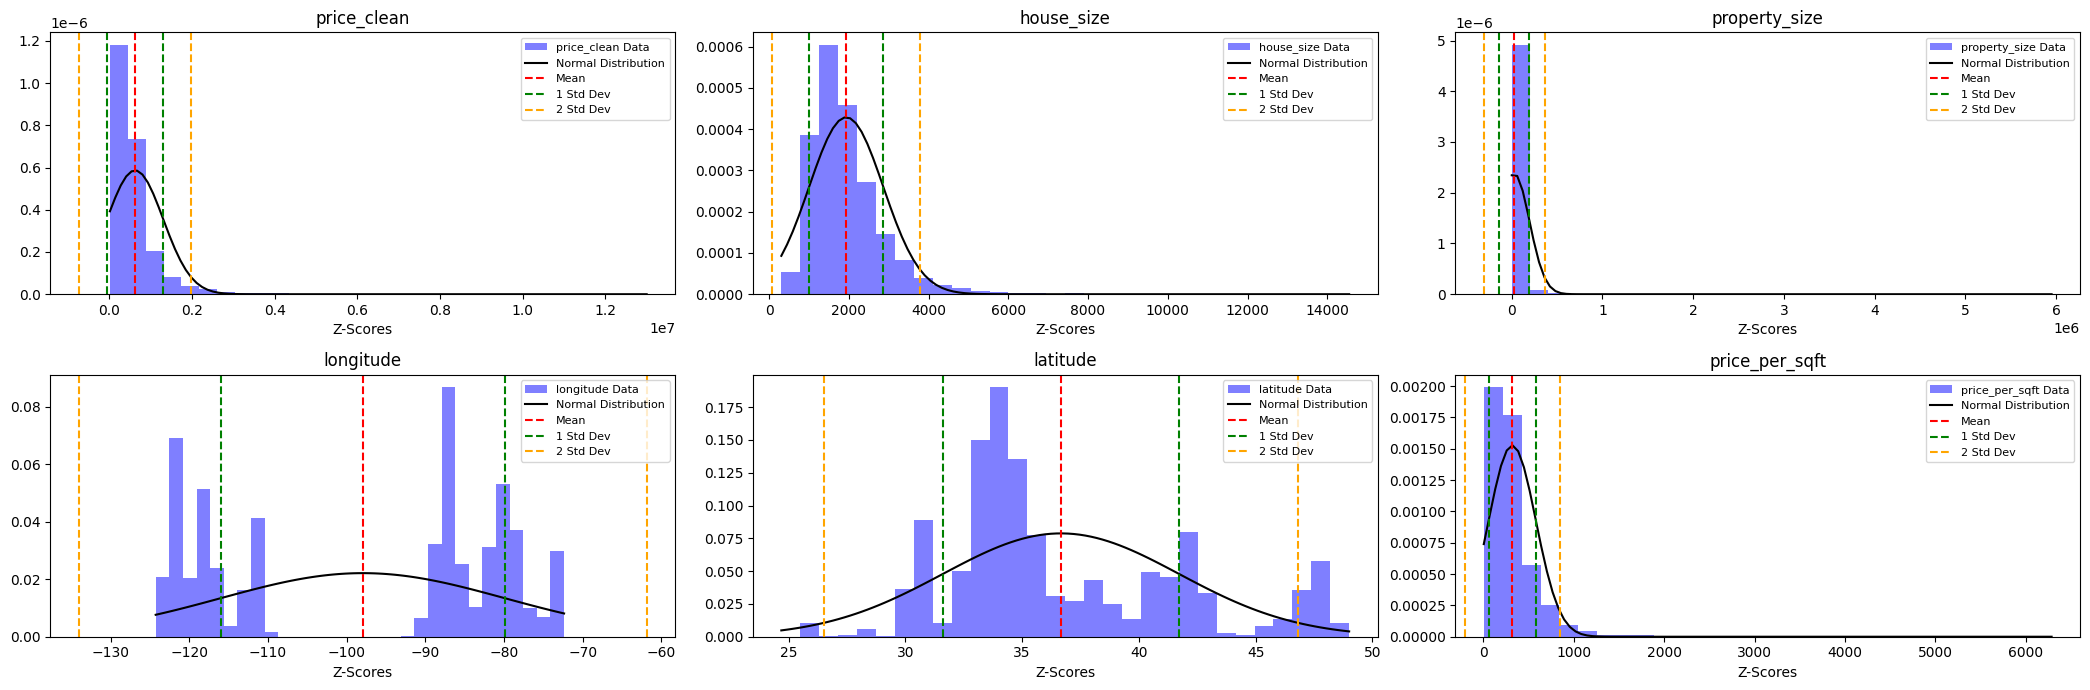

In [ ]:
# columns to visualize
columns = ['price_clean', 'house_size', 'property_size', 'longitude', 'latitude', 'price_per_sqft']

# create a 2x3 subplot layout
fig, axes = plt.subplots(2, 3, figsize=(21, 7))

for i, col in enumerate(columns):

    # determine row and column index for the 2x3 grid
    row = i // 3
    col_index = i % 3

    # stats based on data
    data = df_sanitised[col].dropna()  # Handle NaN values
    mean = data.mean()
    std_dev = data.std()

    # normal distribution curve
    x = np.linspace(data.min(), data.max(), 100)
    y = np.exp(-0.5 * ((x - mean) / std_dev) ** 2) / (std_dev * np.sqrt(2 * np.pi))

    # plot the histogram and normal curve
    axes[row, col_index].hist(data, bins=30, density=True, alpha=0.5, color='blue', label=f"{col} Data")
    axes[row, col_index].plot(x, y, label="Normal Distribution", color='black')

    # add mean and standard deviation lines
    axes[row, col_index].axvline(mean, color='red', linestyle='--', label="Mean")
    axes[row, col_index].axvline(mean + std_dev, color='green', linestyle='--', label="1 Std Dev")
    axes[row, col_index].axvline(mean - std_dev, color='green', linestyle='--')
    axes[row, col_index].axvline(mean + 2 * std_dev, color='orange', linestyle='--', label="2 Std Dev")
    axes[row, col_index].axvline(mean - 2 * std_dev, color='orange', linestyle='--')

    # titles and labels for each subplot
    axes[row, col_index].set_title(f"{col}", fontsize=12)
    axes[row, col_index].set_xlabel("Z-Scores", fontsize=10)
    axes[row, col_index].legend(fontsize=8)

# adjust spacing between subplots
plt.tight_layout()
plt.show()

## iii. Type of Distribution

Understanding the shape of the data's distribution helps in assessing the appropriateness of linear regression models. We looked at skewness and kurtosis to gain insights into the distribution of our variables.

**Skewness**: A measure of the asymmetry of the distribution. Positive skewness indicates a long right tail, while negative skewness suggests a long left tail. A skewness near zero indicates a symmetric distribution.

Skewness values indicate moderate to strong right-skewness in price_clean, house_size, property_size, and price_per_sqft, with very high values suggesting heavy-tailed distributions. This aligns with our previous findings and confirms that log transformations are necessary for these variables to address the skew and extreme outliers.

**Kurtosis**: Measures the "tailedness" of the distribution. A high kurtosis value indicates heavy tails and extreme values, while low kurtosis suggests a flat distribution with fewer outliers.

Kurtosis values further supported the need for log transformations, especially for price_clean, house_size, and property_size, which showed extremely high kurtosis, indicating that the distributions are heavy-tailed with many extreme values. Longitude and latitude had relatively flat distributions with negative kurtosis, suggesting no need for transformations.

In [ ]:
columns = ['price_clean', 'house_size', 'property_size', 'longitude', 'latitude', 'price_per_sqft']

# Calculate skewness and kurtosis
skewness = df_sanitised[columns].apply(skew)
kurtosis_values = df_sanitised[columns].apply(kurtosis)

# Display the results
print("Skewness:")
print(skewness)
print()
print("\nKurtosis:")
print(kurtosis_values)

Skewness:
price_clean        5.974638
house_size         2.278059
property_size     20.439489
longitude         -0.221585
latitude           0.759163
price_per_sqft     4.111531
dtype: float64


Kurtosis:
price_clean        65.001931
house_size         11.574011
property_size     541.272308
longitude          -1.704458
latitude           -0.241112
price_per_sqft     43.650633
dtype: float64


## Perform Log Transformation

We performed log transformations on the following variables: price_clean, house_size, property_size, and price_per_sqft to address the right skewness and extreme outliers identified during the earlier analyses. Log transformations are commonly used to reduce skewness, compress the range of values, and make the distribution more symmetric.


In [ ]:
df_transformed = df_sanitised.copy()

In [ ]:
# apply np.log1p to columns

transform_columns = ['price_clean', 'house_size', 'property_size', 'price_per_sqft']

for col in transform_columns:
  df_transformed[col] = np.log1p(df_transformed[col])

## Comparison Before and After Transformation

We will compare the following for each variable before and after transformation: Mean, median, standard deviation, sewness & kurtosis.



### i. Measure of Central Tendency

After applying the log transformation: the mean, median, and mode values for these variables were compressed into a more manageable range, reducing the influence of extreme outliers.Therefor, the log transformation has successfully addressed the issues identified in the initial analysis, particularly the right-skewness and heavy-tailed distributions of the numerical variables (price_clean, house_size, property_size, and price_per_sqft). Before the transformation, these variables exhibited significant outliers and a wide range of values, which could have skewed the results of linear regression modeling.

In [ ]:
columns = ['price_clean', 'house_size', 'property_size', 'price_per_sqft']

print("         Before      After")
for col in columns:
    print(col)
    print(f"Mean:   {round(df_sanitised[col].mean(), 2)}   {round(df_transformed[col].mean(), 2)}")
    print(f"Median: {round(df_sanitised[col].median(), 2)}    {round(df_transformed[col].median(), 2)}")
    print(f"Mode:   {round(df_sanitised[col].mode()[0], 2)}   {round(df_transformed[col].mode()[0], 2)}")
    print()

         Before      After
price_clean
Mean:   622021.48   13.03
Median: 439000.0    12.99
Mode:   350000   12.77

house_size
Mean:   1936.34   7.47
Median: 1740.0    7.46
Mode:   1200.0   7.09

property_size
Mean:   27763.5   8.44
Median: 2185.0    7.69
Mode:   10890.0   9.3

price_per_sqft
Mean:   322.39   5.56
Median: 242.11    5.49
Mode:   250.0   5.53



### ii. Measure of Spread

Similar to the measure of central of tendency, after performing the log transformation on the variables, the standard deviations have significantly decreased, indicating a reduction in the spread of the data. This is a positive outcome, as it suggests that the extreme values and outliers, which initially contributed to large variability, are now more controlled.



In [ ]:
columns = ['price_clean', 'house_size', 'property_size', 'price_per_sqft']

print('Standard Deviation Before   After')
for col in columns:
  print(col, df_sanitised[col].describe()['std'], df_transformed[col].describe()['std'])
  print()

Standard Deviation Before   After
price_clean 680124.4097509452 0.7648385902412002

house_size 930.7955799925177 0.4287395692177354

property_size 167944.10729533888 1.5523110087133278

price_per_sqft 261.185647505597 0.6475126322926249



### iii. Type of Distribution

Overall, the log transformation significantly improved the distribution of the data by reducing both skewness and kurtosis. Before transformation, the variables price_clean, house_size, property_size, and price_per_sqft exhibited high positive skewness, indicating right-skewed distributions with extreme outliers. The kurtosis values were also very high, suggesting heavy-tailed distributions with many outliers. After applying the log transformation, skewness values were reduced to near zero, indicating more symmetric distributions, while kurtosis values dropped significantly, indicating fewer extreme values and a more normal distribution. Overall, the transformation improved the suitability of the data for linear regression by normalising the distributions and reducing the impact of outliers.












In [ ]:
columns = ['price_clean', 'house_size', 'property_size', 'price_per_sqft']

# calculate skewness and kurtosis
skewness_before = df_sanitised[columns].apply(skew)
skewness_after = df_transformed[columns].apply(skew)

kurtosis_values_before = df_sanitised[columns].apply(kurtosis)
kurtosis_values_after = df_transformed[columns].apply(kurtosis)

# display the results
print("Skewness Before:")
print(skewness_before)
print()
print("Skewness After:")
print(skewness_after)

print()
print("Kurtosis Before:")
print(kurtosis_values_before)
print()
print("Kurtosis After:")
print(kurtosis_values_after)

Skewness Before:
price_clean        5.974638
house_size         2.278059
property_size     20.439489
price_per_sqft     4.111531
dtype: float64

Skewness After:
price_clean       0.051180
house_size        0.167803
property_size     1.035580
price_per_sqft    0.082956
dtype: float64

Kurtosis Before:
price_clean        65.001931
house_size         11.574011
property_size     541.272308
price_per_sqft     43.650633
dtype: float64

Kurtosis After:
price_clean       1.266580
house_size        0.496521
property_size     0.465174
price_per_sqft    1.037201
dtype: float64


# 5. Data Visualisation

For this section, we will visualise key data series, focusing on variables price_clean, house_size, price_per_sqft and property_size to observe its distribution before and after normalisation. These visualisations help us better understand the data's underlying patterns, relationships, and any potential anomalies that might not be easily detectable through summary statistics alone.

Visualisations Overview:

- Price_clean Distribution: The histogram for price_clean shows a bell-shaped curve after normalisation. This indicates that after applying the log transformation, the variable is more symmetrically distributed, with reduced skewness. The transformation helps mitigate the influence of extreme outliers that skew the data.

- House_size Distribution: Similar to price_clean, the histogram for house_size shows a more symmetric distribution post-transformation. The spread of house sizes is now better centered, and the previous extreme skew is significantly reduced, making the data more suitable for linear regression modeling.

- Price_per_sqft Distribution: After normalisation, the distribution of price_per_sqft becomes more balanced, with a clear peak around certain values. The heavy right tail, which was prominent before transformation, is now reduced. This makes the analysis of price per square foot more reliable by removing extreme outliers.

- Property_size Distribution: The most interesting visualisation is for property_size, as it reveals two distinct clusters after normalisation. This suggests that the dataset contains two major types of properties: one with smaller sizes and another with significantly larger land areas. This could point to different market segments or property categories within the data, which could be useful for further segmentation in the modeling phase.

Hence, the visualisations confirm our earlier findings from statistical analysis. While the distributions of price_clean, house_size, and price_per_sqft have been normalised to more symmetric shapes after log transformation, property_size exhibits a bimodal distribution, indicating that there may be two distinct groups of properties. This insight is crucial as it suggests that property_size might need to be handled differently in further modeling.








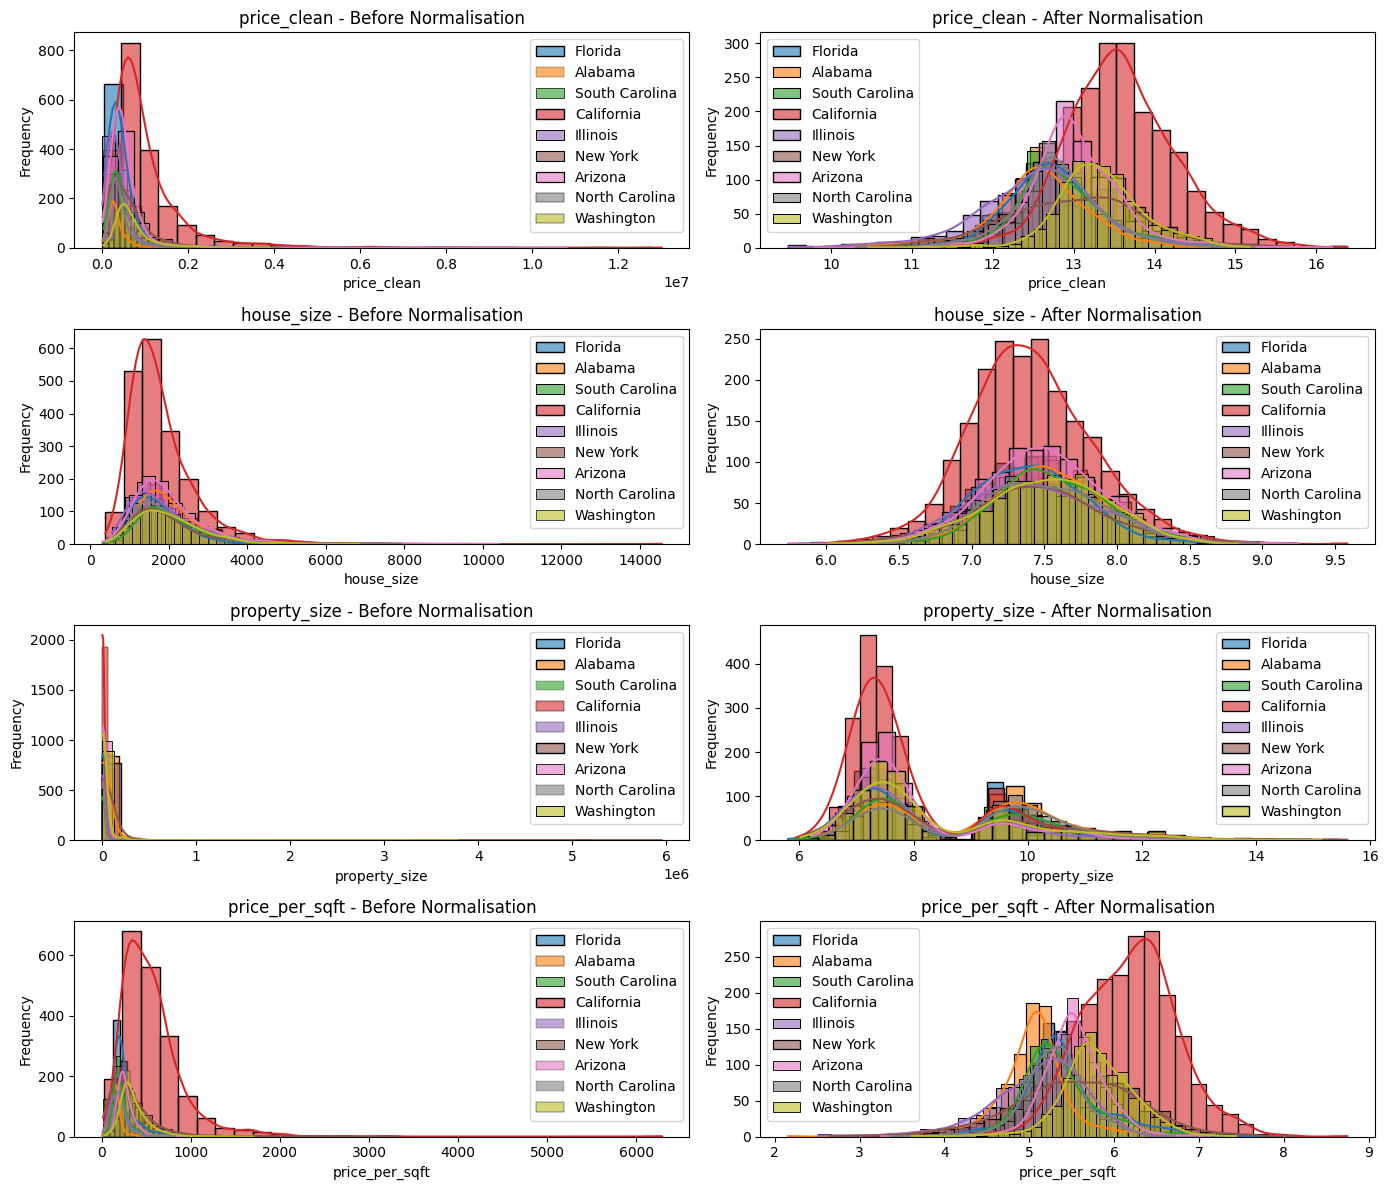

In [ ]:
# list of columns to compare
columns = ['price_clean', 'house_size', 'property_size', 'price_per_sqft']

# define the states to visualise
states = df_transformed['state_name'].unique()

# create a 2x4 grid of subplots (4 features, 2 histograms for before and after)
fig, axes = plt.subplots(4, 2, figsize=(14, 12))

for i, column in enumerate(columns):

    # plot before normalisation
    ax1 = axes[i, 0]
    for state in states:
        sns.histplot(df_sanitised[df_sanitised['state_name'] == state][column], kde=True, label=state, ax=ax1, bins=30, alpha=0.6)
    ax1.set_title(f'{column} - Before Normalisation')
    ax1.set_xlabel(column)
    ax1.set_ylabel('Frequency')
    ax1.legend()

    # plot after normalisation
    ax2 = axes[i, 1]
    for state in states:
        sns.histplot(df_transformed[df_transformed['state_name'] == state][column], kde=True, label=state, ax=ax2, bins=30, alpha=0.6)
    ax2.set_title(f'{column} - After Normalisation')
    ax2.set_xlabel(column)
    ax2.set_ylabel('Frequency')
    ax2.legend()

# adjust layout
plt.tight_layout()
plt.show()

# 6. Machine Learning Model

---

In this section, we outline the construction of two models:

- Model 1 (house_size vs price)
- Model 2 (city, street_name, and house_size vs price).

**Data Split: 70%, 15%, 15%**

To ensure that the model generalises well to unseen data, we split the dataset into three parts:
1. Training set (70%): Used to train the model and adjust the model parameters.
2. Validation set (15%): Used to fine-tune the model and help choose the best hyperparameters.
3. Test set (15%): Used to evaluate the performance of the trained model on unseen data.

To ensure that all nine states are represented fairly across the 3 sets, stratified spitting is performed. This ensures that the model is not overfitting to the training data and can generalise well to new, unseen data.



## Model 1: house_size vs price (Base Model)

Features:
- house_size: This feature represents the size of the house in square feet. It is selected because property size is generally a direct indicator of its price. Larger houses tend to have higher prices due to the larger area, making this a baseline predictor in the model.

Label:
- price: This is the target variable that the model aims to predict. The price is the dependent variable, and our goal is to learn the relationship between the house size and the price of a property.

Justification for Feature Selection:
- house_size is a key feature because it correlates strongly with the price of a property. Typically, larger homes are more expensive, so it is logical to use house size as a predictor.

This model is used as a baseline (or "base model") to compare how well a single feature can predict the target compared to models with more complex sets of features.

Importance of Feature for Model Building:

house_size is critical because it serves as a key indicator of property value. By training a linear regression model with only this feature, we can understand the basic relationship between the size of a property and its price, which forms the foundation of the more complex models.


In [ ]:
# Define features and target
X = ['house_size']  # Features
y = 'price_clean'  # Target

# Perform stratified split by 'state_name' to ensure representation of all states
train_data, temp_data = train_test_split(df_transformed, test_size=0.3, random_state=42, stratify=df_transformed['state_name'])
X_train, y_train = train_data[X], train_data[y]
X_temp, y_temp = temp_data[X], temp_data[y]

# Split temp into validation (50% of temp) and test (50% of temp)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Sizes of each set
print(f"Training set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Test set: {len(X_test)} samples")

Training set: 6483 samples
Validation set: 1389 samples
Test set: 1390 samples


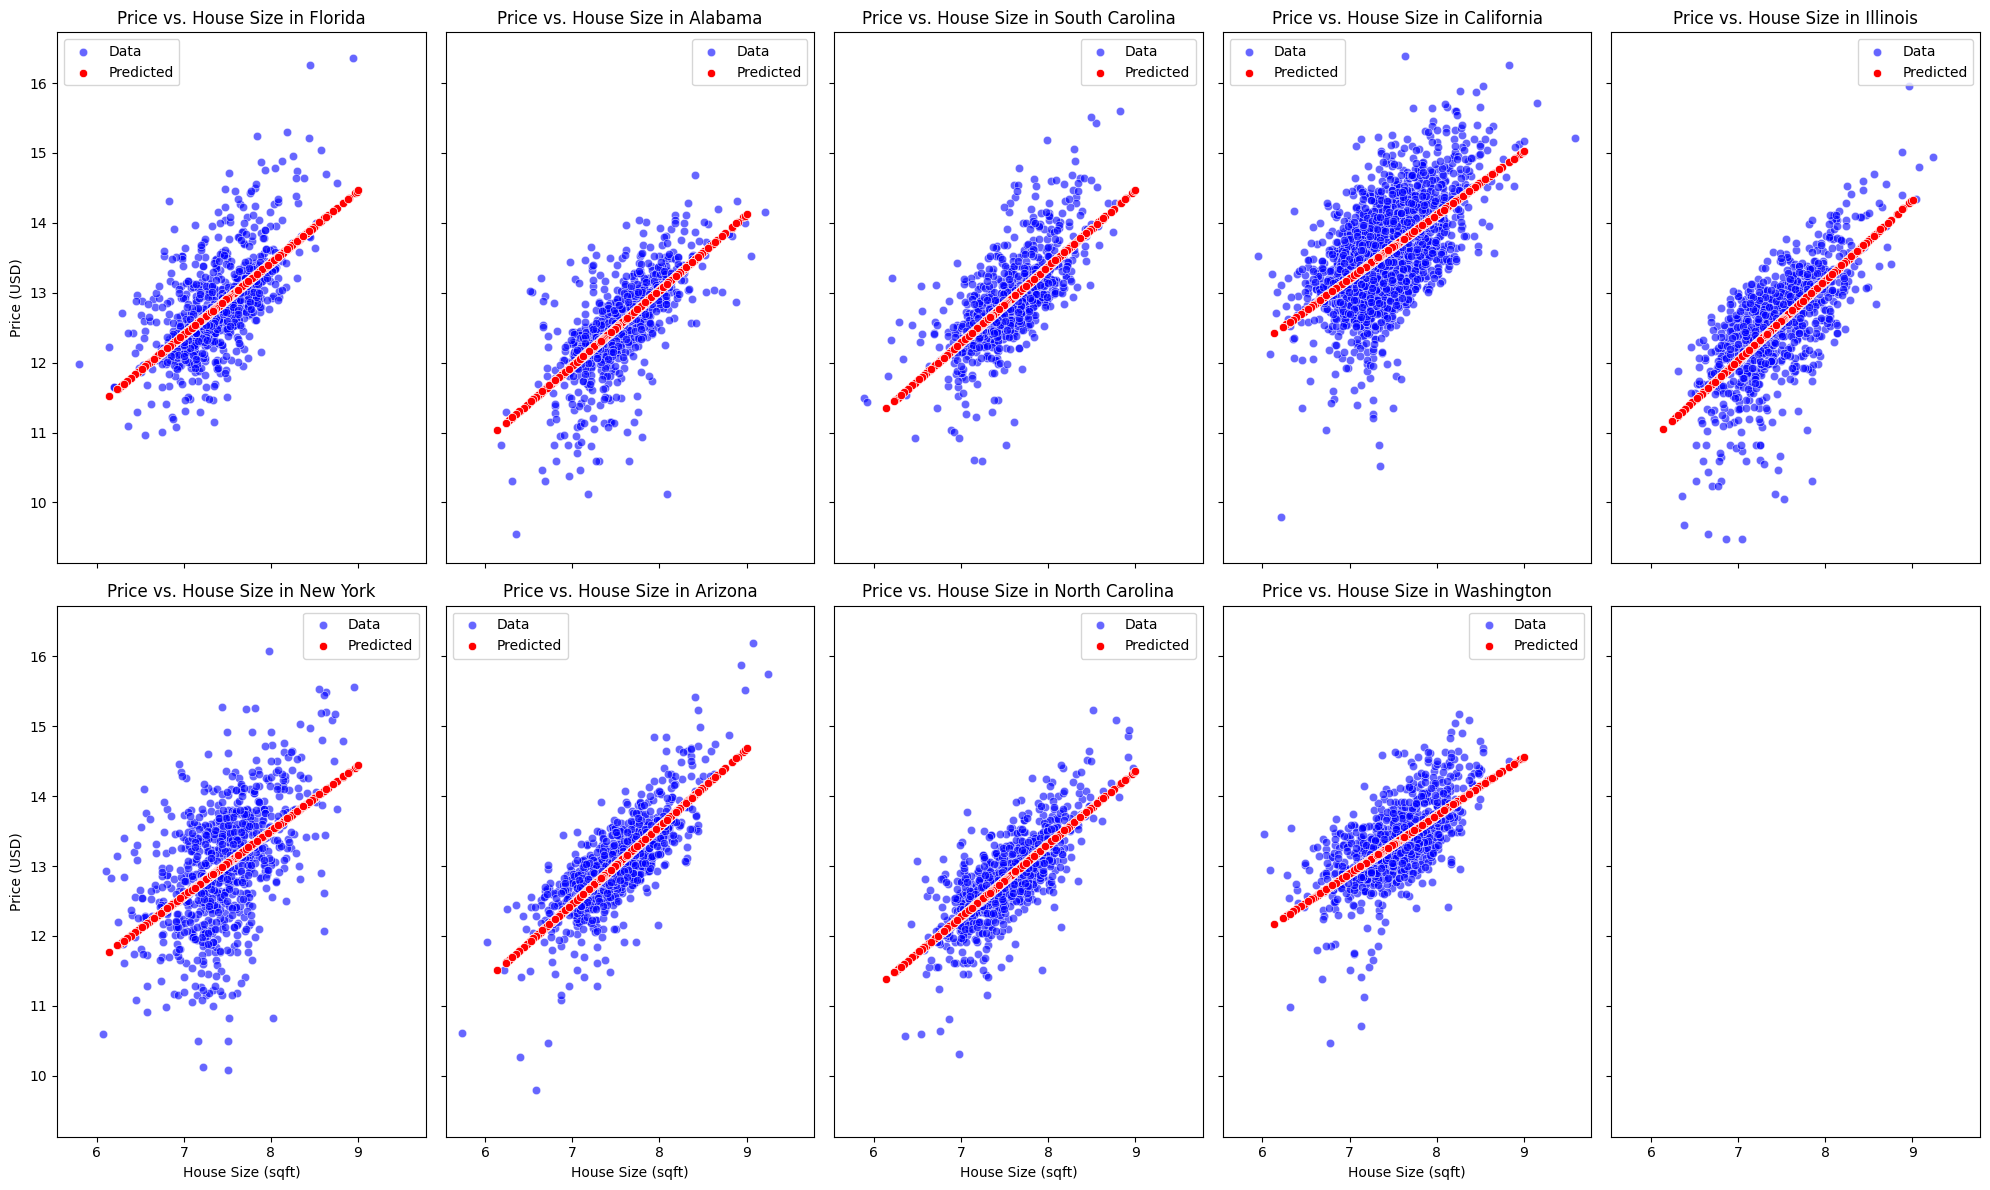

In [ ]:
base_model_data = []

# Create a 2x5 grid for plotting with shared axes
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 12), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Loop through each state and train a separate model
for i, state in enumerate(df_transformed['state_name'].unique()):
    # Filter data for the current state
    state_data = df_transformed[df_transformed['state_name'] == state]

    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(state_data[X], state_data[y])  # Train on state-specific data

    # Predict the prices for the validation set
    y_pred = model.predict(X_val)

    # Calculate performance metrics for the current model
    r2 = r2_score(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    base_model_data.append([state, r2, mse])

    # Plot the data points and regression predictions (projected along house_size for simplicity)
    sns.scatterplot(x=state_data['house_size'], y=state_data[y], label='Data', color='blue', alpha=0.6, ax=axes[i])
    sns.scatterplot(x=X_val['house_size'], y=y_pred, color='red', label='Predicted', ax=axes[i])

    axes[i].set_title(f'Price vs. House Size in {state}')
    axes[i].set_xlabel('House Size (sqft)')
    axes[i].set_ylabel('Price (USD)')
    axes[i].legend()

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


## Model 2: Training on House Size, Street and City features

Features:
- city: The city in which the property is located is an important feature since housing prices often vary significantly between cities due to economic factors, demand, and geographical desirability. Cities with higher living costs or better amenities generally have higher property prices.

- street_name: The specific street or neighborhood within the city might also influence property prices, especially if certain areas are more prestigious or have better infrastructure. This can introduce further nuances to pricing models based on location.
house_size: Just as in Model 1, house_size remains an important feature due to its direct correlation with the price.

Label:
- price: This remains the target variable we are trying to predict.

Justification for Feature Selection:
- city and street_name are both categorical location-based variables that can have a large impact on property prices. For instance, houses in certain cities or streets may have a premium price due to their proximity to amenities, job opportunities, or desired locations (e.g., beachfront properties, central business districts).
- house_size remains an essential feature as it directly impacts the price, providing an indication of the property's overall value.

Importance of Features for Model Building:
- city and street_name allow the model to take into account the geographic and urban context of the property, which can strongly influence the price.
Properties in upscale neighborhoods (or cities) will likely cost more than those in less sought-after locations.
- house_size continues to provide a physical measure of the property's value, which is typically one of the most important predictors of price.

In [ ]:
# One-Hot Encode categorical features 'city' and 'street'
df_encoded = pd.get_dummies(df_transformed, columns=['city', 'street'], drop_first=True)

# Define features and target after encoding
X = ['house_size'] + [col for col in df_encoded.columns if col.startswith('city_') or col.startswith('street_')]  # Updated Features
y = 'price_clean'  # Target

# Perform stratified split by 'state_name' to ensure representation of all states
train_data, temp_data = train_test_split(df_encoded, test_size=0.3, random_state=42, stratify=df_encoded['state_name'])
X_train, y_train = train_data[X], train_data[y]
X_temp, y_temp = temp_data[X], temp_data[y]

# Split temp into validation (50% of temp) and test (50% of temp)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Sizes of each set
print(f"Training set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Test set: {len(X_test)} samples")

Training set: 6483 samples
Validation set: 1389 samples
Test set: 1390 samples


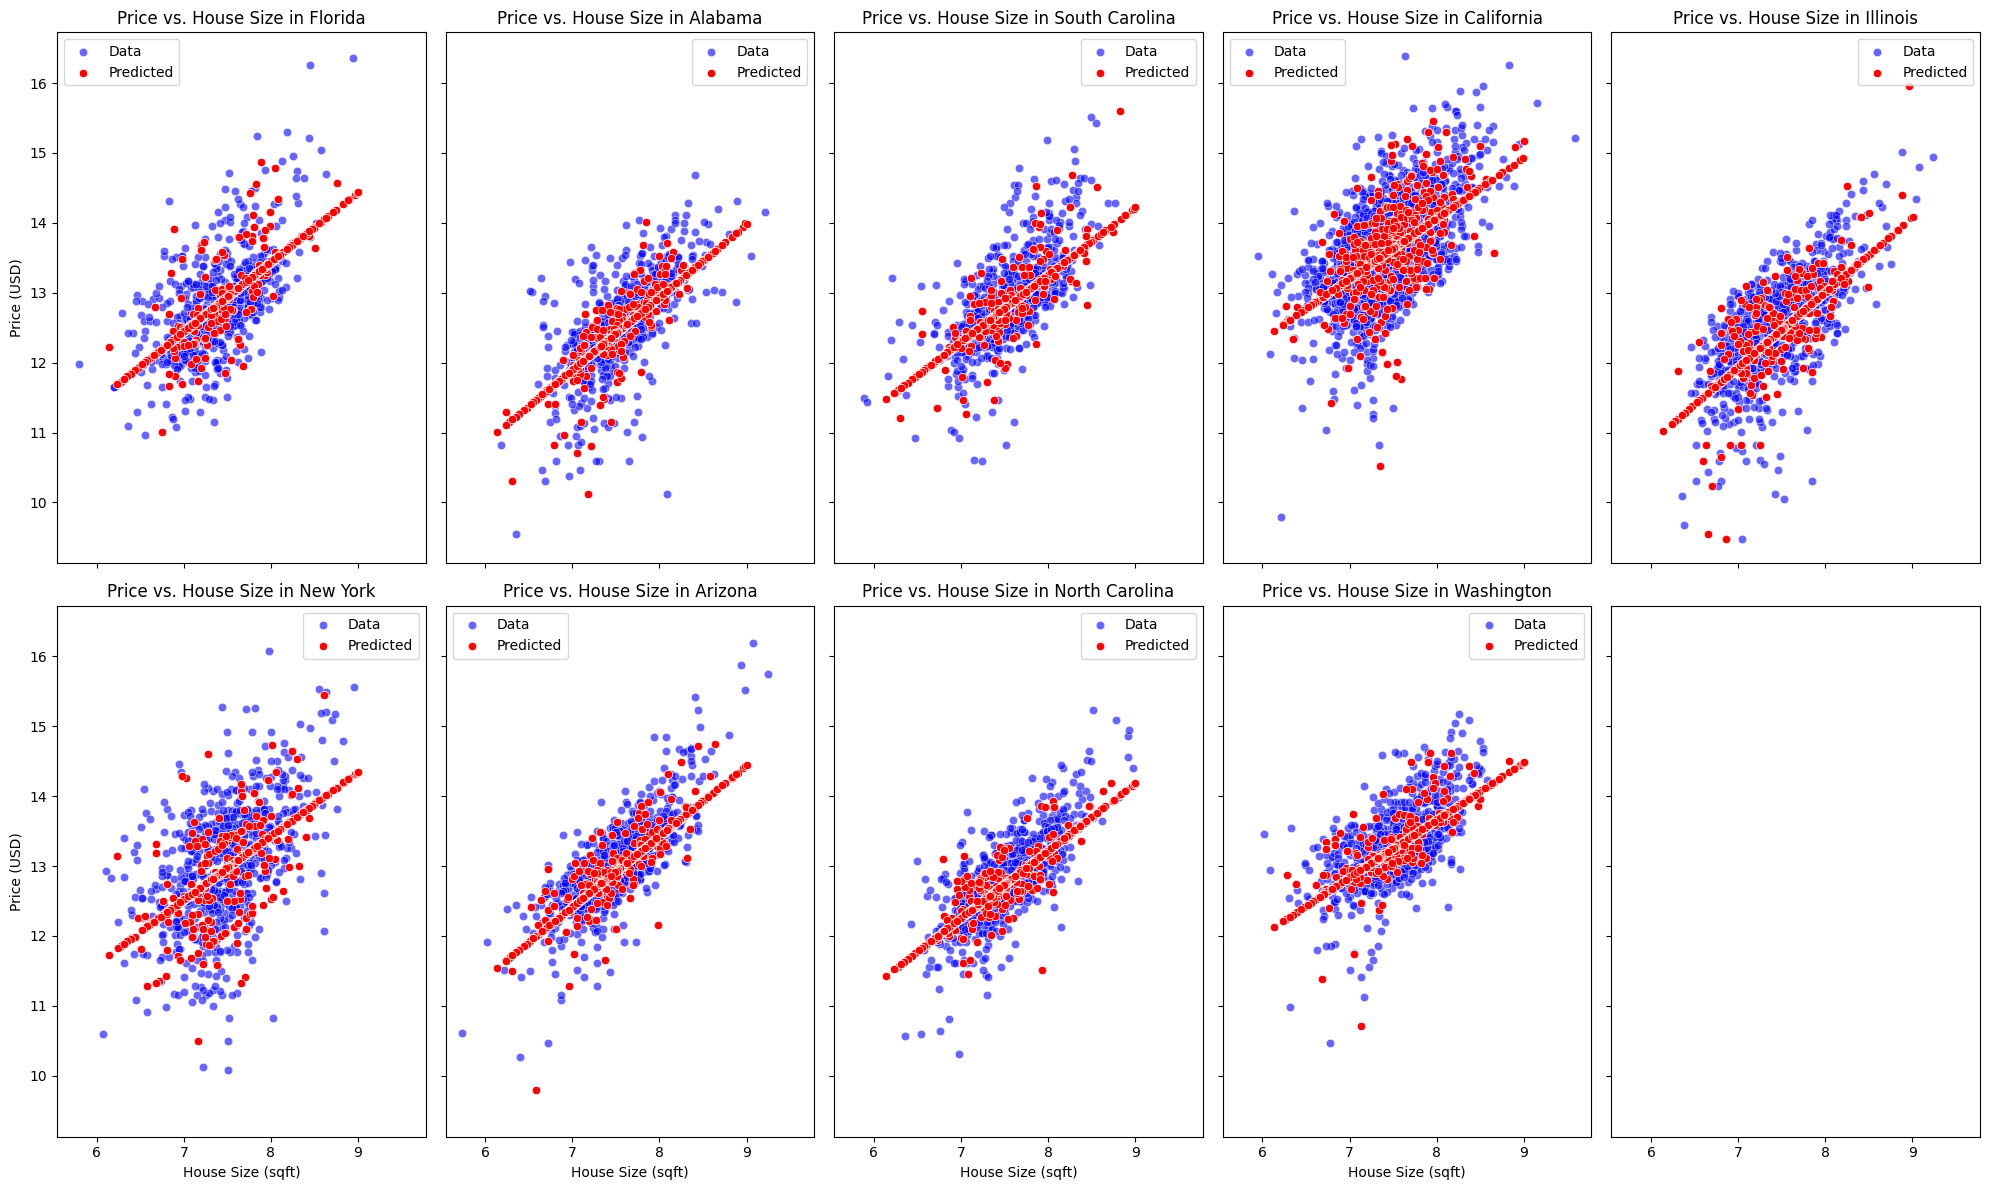

In [ ]:
base_model2_data = []

# Create a 2x5 grid for plotting with shared axes
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 12), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Loop through each state and train a separate model
for i, state in enumerate(df_encoded['state_name'].unique()):
    # Filter data for the current state
    state_data = df_encoded[df_encoded['state_name'] == state]

    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(state_data[X], state_data[y])  # Train on state-specific data

    # Predict the prices for the validation set
    y_pred = model.predict(X_val)

    # Calculate performance metrics for the current model
    r2 = r2_score(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    base_model2_data.append([state, r2, mse])

    # Plot the data points and regression predictions (projected along house_size for simplicity)
    sns.scatterplot(x=state_data['house_size'], y=state_data[y], label='Data', color='blue', alpha=0.6, ax=axes[i])
    sns.scatterplot(x=X_val['house_size'], y=y_pred, color='red', label='Predicted', ax=axes[i])

    axes[i].set_title(f'Price vs. House Size in {state}')
    axes[i].set_xlabel('House Size (sqft)')
    axes[i].set_ylabel('Price (USD)')
    axes[i].legend()

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


## Model Evaluation
The models' performance is evaluated using R-squared (R2) and Mean Squared Error (MSE) metrics, which indicate the model's fit and predictive accuracy:

- R-squared: A higher value (closer to 1) suggests the model explains most of the variability in property prices.
- MSE: A lower value (closer to 0) indicates better model accuracy, with smaller errors in predictions.

The performance of Model 1 (House Size vs. Price) and Model 2 (House Size, City & Street vs. Price) was assessed across states using R-squared (R²) and Mean Squared Error (MSE) metrics to evaluate their fit and predictive accuracy.

From the results below we can see that, Model 2 generally outperforms Model 1. For most states, Model 2 (with additional features, i.e., city and street) showed better predictive accuracy, reflected in higher R² values and lower MSE. This suggests that including location-based features helps capture variability in prices more effectively than house size alone. States, such as Florida and New York, showed significant gains, others like Alabama and Illinois exhibited minimal or even negative improvements.

In [ ]:
# state, r2, mse

print('Model 1: House Size vs Price')
print('Model 2: House Size, City & Street vs Price')
print()

print('          R2    MSE')
for i in range(len(base_model_data)):
  print(base_model_data[i][0])
  print('Model 1 ', round(base_model_data[i][1], 3), round(base_model_data[i][2], 3))
  print('Model 2 ', round(base_model2_data[i][1], 3), round(base_model2_data[i][2], 3))
  print()

Model 1: House Size vs Price
Model 2: House Size, City & Street vs Price

          R2    MSE
Florida
Model 1  0.263 0.463
Model 2  0.318 0.429

Alabama
Model 1  -0.214 0.763
Model 2  -0.34 0.843

South Carolina
Model 1  0.208 0.498
Model 2  0.184 0.513

California
Model 1  -0.267 0.797
Model 2  -0.101 0.692

Illinois
Model 1  -0.045 0.657
Model 2  -0.204 0.757

New York
Model 1  0.296 0.443
Model 2  0.328 0.423

Arizona
Model 1  0.291 0.446
Model 2  0.297 0.442

North Carolina
Model 1  0.182 0.515
Model 2  0.148 0.536

Washington
Model 1  0.193 0.508
Model 2  0.263 0.463



# 7. Validation using K-Fold Cross Validation

K-Fold Cross-Validation is used to evaluate the model's performance robustly, given the relatively small training set per state (~600, except California). This method ensures that the model is trained and validated on multiple data splits, reducing bias and variance in the performance evaluation.


In [ ]:
# One-Hot Encode categorical features 'city' and 'street'
df_encoded = pd.get_dummies(df_transformed, columns=['city', 'street'], drop_first=True)

# Define features and target after encoding
X = ['house_size'] + [col for col in df_encoded.columns if col.startswith('city_') or col.startswith('street_')]  # Updated Features
y = 'price_clean'  # Target

# Perform stratified split by 'state_name' to ensure representation of all states
train_data, temp_data = train_test_split(df_encoded, test_size=0.3, random_state=42, stratify=df_encoded['state_name'])
X_train, y_train = train_data[X], train_data[y]
X_temp, y_temp = temp_data[X], temp_data[y]

# Split temp into validation (50% of temp) and test (50% of temp)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Sizes of each set
print(f"Training set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Test set: {len(X_test)} samples")

Training set: 6483 samples
Validation set: 1389 samples
Test set: 1390 samples


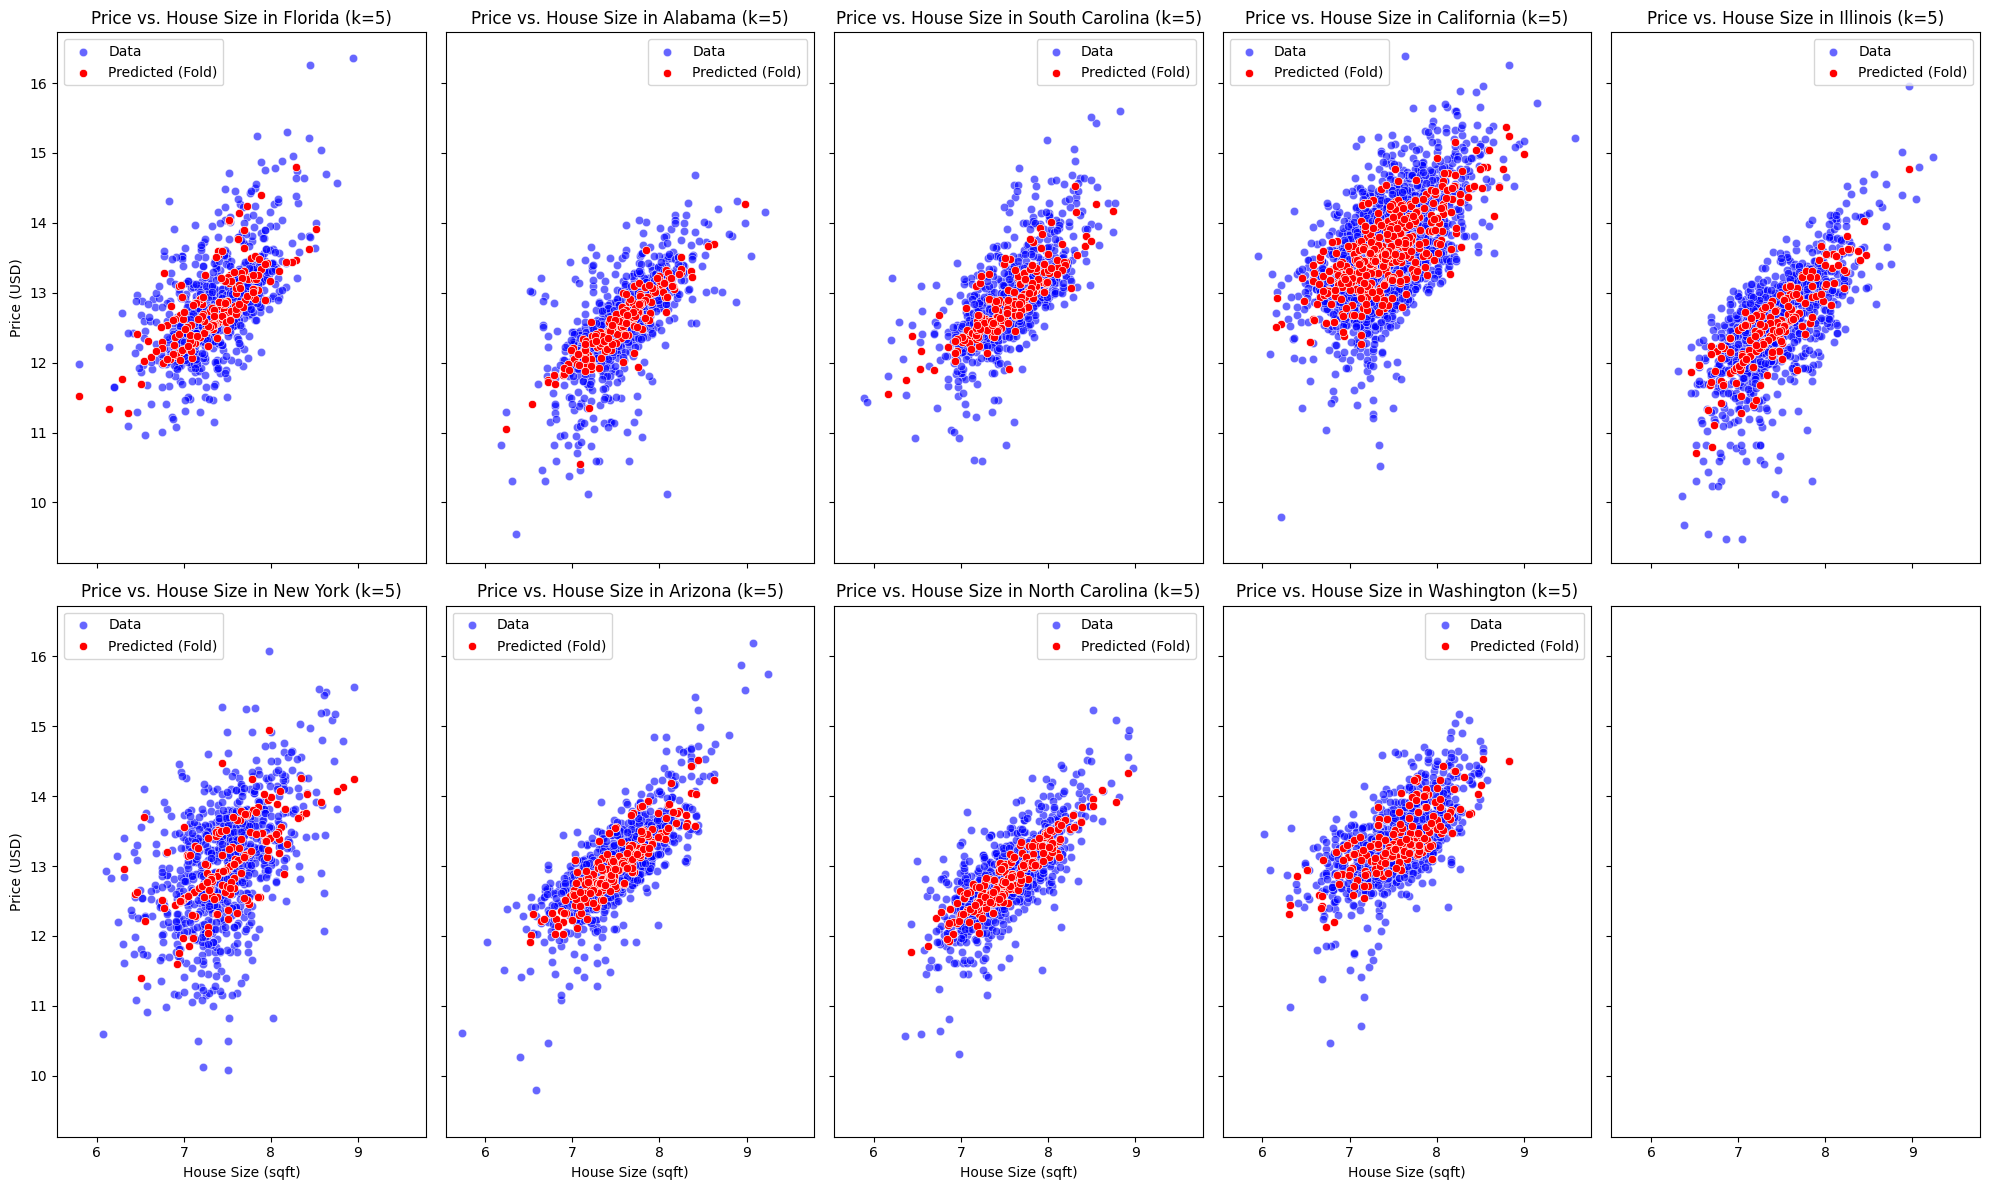

In [ ]:
# Initialize k-fold cross-validator
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

base_model2_with_k_fold = []

# Create a 2x5 grid for plotting with shared axes
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 12), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, state in enumerate(df_encoded['state_name'].unique()):
    # Filter data for the current state
    state_data = df_encoded[df_encoded['state_name'] == state]

    # Extract features and target
    state_X = state_data[X]
    state_y = state_data[y]

    fold_metrics = []  # Store metrics for each fold

    for fold_idx, (train_idx, val_idx) in enumerate(kf.split(state_X)):
        # Split data into train and validation sets
        X_train, X_val = state_X.iloc[train_idx], state_X.iloc[val_idx]
        y_train, y_val = state_y.iloc[train_idx], state_y.iloc[val_idx]

        # Train the model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict on the validation set
        y_pred = model.predict(X_val)

        # Calculate performance metrics
        r2 = r2_score(y_val, y_pred)
        mse = mean_squared_error(y_val, y_pred)
        fold_metrics.append((r2, mse))

    # Average the metrics across folds
    avg_r2 = np.mean([m[0] for m in fold_metrics])
    avg_mse = np.mean([m[1] for m in fold_metrics])
    base_model2_with_k_fold.append([state, avg_r2, avg_mse])

    # Plot the data points and regression predictions for the last fold
    sns.scatterplot(x=state_X['house_size'], y=state_y, label='Data', color='blue', alpha=0.6, ax=axes[i])
    sns.scatterplot(x=X_val['house_size'], y=y_pred, color='red', label='Predicted (Fold)', ax=axes[i])

    axes[i].set_title(f'Price vs. House Size in {state} (k={k})')
    axes[i].set_xlabel('House Size (sqft)')
    axes[i].set_ylabel('Price (USD)')
    axes[i].legend()

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

### Model Evaluation

Using K-fold validation (Model 3), the R² and MSE has significantly improved, across all states.
- The R² values are consistently high across all states (e.g., Arizona: 0.737, South Carolina: 0.673), indicating a strong fit to the data.
* MSE is substantially reduced, reflecting more accurate predictions (e.g., Arizona: 0.094, Florida: 0.151).

The inclusion of location-based features (city and street) is better leveraged through K-Fold validation, which effectively balances the model's complexity. Overall, we can confirm that K-fold validation provides a more robust evaluation by using all available data for training across multiple folds.

In [ ]:
# state, r2, mse

print('Model 1: House Size vs Price')
print('Model 2: House Size, City & Street vs Price')
print('Model 3: House Size, City & Street vs Price with K-Fold')
print()

print('          R2    MSE')
for i in range(len(base_model_data)):
  print(base_model_data[i][0])
  print('Model 1 ', round(base_model_data[i][1], 3), round(base_model_data[i][2], 3))
  print('Model 2 ', round(base_model2_data[i][1], 3), round(base_model2_data[i][2], 3))
  print('Model 3 ', round(base_model2_with_k_fold[i][1], 3), round(base_model2_with_k_fold[i][2], 3))
  print()

Model 1: House Size vs Price
Model 2: House Size, City & Street vs Price
Model 3: House Size, City & Street vs Price with K-Fold

          R2    MSE
Florida
Model 1  0.263 0.463
Model 2  0.318 0.429
Model 3  0.645 0.151

Alabama
Model 1  -0.214 0.763
Model 2  -0.34 0.843
Model 3  0.569 0.179

South Carolina
Model 1  0.208 0.498
Model 2  0.184 0.513
Model 3  0.673 0.136

California
Model 1  -0.267 0.797
Model 2  -0.101 0.692
Model 3  0.657 0.163

Illinois
Model 1  -0.045 0.657
Model 2  -0.204 0.757
Model 3  0.671 0.199

New York
Model 1  0.296 0.443
Model 2  0.328 0.423
Model 3  0.568 0.322

Arizona
Model 1  0.291 0.446
Model 2  0.297 0.442
Model 3  0.737 0.094

North Carolina
Model 1  0.182 0.515
Model 2  0.148 0.536
Model 3  0.642 0.117

Washington
Model 1  0.193 0.508
Model 2  0.263 0.463
Model 3  0.636 0.113



# 8. Feature Engineering

---

For this model, I tried out three key feature engineering changes to see if there are improvements in the model's performance:

1. Replacing Street and City with Latitude and Longitude

Rationale: Latitude and longitude offer precise geographical coordinates, capturing spatial relationships and location-specific factors more effectively than variables like street and city. This transformation enables the model to understand how proximity and location-specific features (e.g., amenities, neighborhood quality) influence property prices.

2. Including Price per Sqft in the Regression Model

Rationale: Price per square foot is a normalised metric that reflects the cost efficiency of properties, helping to mitigate variability caused by differing property sizes. Incorporating this feature allows the model to better predict property prices by accounting for regional and size-related price trends.

3. Including House with Land

Rationale: The standard deviation graph for property size revealed two distinct clusters, suggesting the dataset includes both standalone homes and homes with significant land area. Introducing a derived feature like "house_with_land" (indicating whether a property has house with land) helps differentiate these clusters, improving the model's ability to capture price variations due to land value.
These feature engineering steps aim to enhance the model's capacity to capture complex relationships between property characteristics and prices, ultimately improving predictive accuracy.

## i. Replacing Street and City with Latitude and Longitude

  The high cardinality of categorical variables like street and city leads to data sparsity after one-hot encoding. This reduces the effectiveness of training and testing due to the limited number of meaningful training examples per category.

  Using longitude and latitude directly will embed the geographical relationships between properties without requiring extensive encoding, making the model computationally efficient and more generalizable.

In [ ]:
# Define features and target
X = ['house_size', 'longitude', 'latitude']  # Features
y = 'price_clean'  # Target

# Perform stratified split by 'state_name' to ensure representation of all states
train_data, temp_data = train_test_split(df_transformed, test_size=0.3, random_state=42, stratify=df_transformed['state_name'])
X_train, y_train = train_data[X], train_data[y]
X_temp, y_temp = temp_data[X], temp_data[y]

# Split temp into validation (50% of temp) and test (50% of temp)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Sizes of each set
print(f"Training set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Test set: {len(X_test)} samples")

Training set: 6483 samples
Validation set: 1389 samples
Test set: 1390 samples


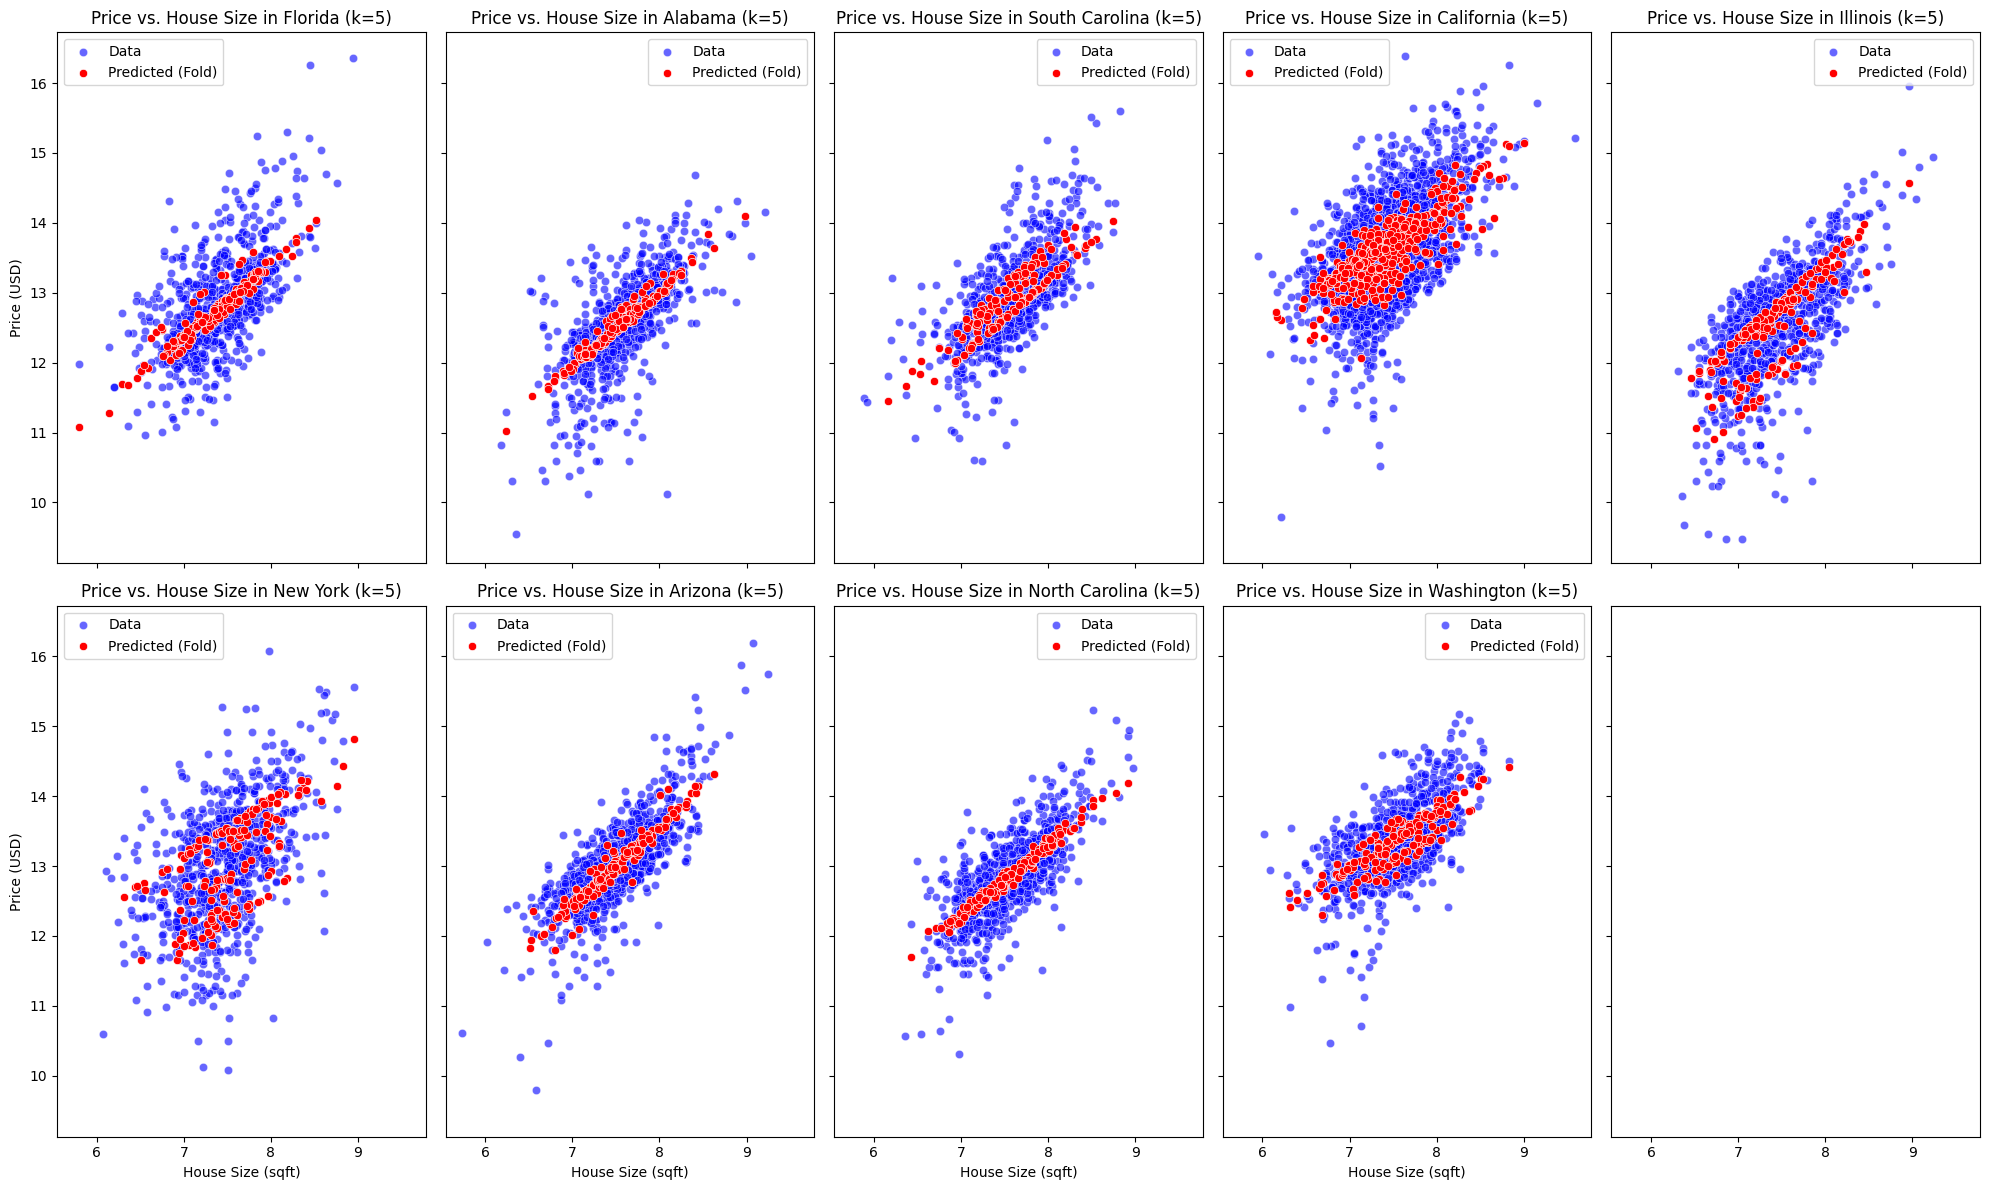

In [ ]:
# Initialize k-fold cross-validator
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

engineered_model_with_k_fold = []

# Create a 2x5 grid for plotting with shared axes
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 12), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, state in enumerate(df_encoded['state_name'].unique()):
    # Filter data for the current state
    state_data = df_encoded[df_encoded['state_name'] == state]

    # Extract features and target
    state_X = state_data[X]
    state_y = state_data[y]

    fold_metrics = []  # Store metrics for each fold

    for fold_idx, (train_idx, val_idx) in enumerate(kf.split(state_X)):
        # Split data into train and validation sets
        X_train, X_val = state_X.iloc[train_idx], state_X.iloc[val_idx]
        y_train, y_val = state_y.iloc[train_idx], state_y.iloc[val_idx]

        # Train the model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict on the validation set
        y_pred = model.predict(X_val)

        # Calculate performance metrics
        r2 = r2_score(y_val, y_pred)
        mse = mean_squared_error(y_val, y_pred)
        fold_metrics.append((r2, mse))

    # Average the metrics across folds
    avg_r2 = np.mean([m[0] for m in fold_metrics])
    avg_mse = np.mean([m[1] for m in fold_metrics])
    engineered_model_with_k_fold.append([state, avg_r2, avg_mse])

    # Plot the data points and regression predictions for the last fold
    sns.scatterplot(x=state_X['house_size'], y=state_y, label='Data', color='blue', alpha=0.6, ax=axes[i])
    sns.scatterplot(x=X_val['house_size'], y=y_pred, color='red', label='Predicted (Fold)', ax=axes[i])

    axes[i].set_title(f'Price vs. House Size in {state} (k={k})')
    axes[i].set_xlabel('House Size (sqft)')
    axes[i].set_ylabel('Price (USD)')
    axes[i].legend()

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

## Including Street, City, Longitude and Latitude

In [ ]:
# One-Hot Encode categorical features 'city' and 'street'
df_encoded = pd.get_dummies(df_transformed, columns=['city', 'street'], drop_first=True)

# Define features and target after encoding
X = ['house_size', 'longitude', 'latitude'] + [col for col in df_encoded.columns if col.startswith('city_') or col.startswith('street_')]  # Updated Features
y = 'price_clean'  # Target

# Perform stratified split by 'state_name' to ensure representation of all states
train_data, temp_data = train_test_split(df_encoded, test_size=0.3, random_state=42, stratify=df_encoded['state_name'])
X_train, y_train = train_data[X], train_data[y]
X_temp, y_temp = temp_data[X], temp_data[y]

# Split temp into validation (50% of temp) and test (50% of temp)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Sizes of each set
print(f"Training set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Test set: {len(X_test)} samples")

Training set: 6483 samples
Validation set: 1389 samples
Test set: 1390 samples


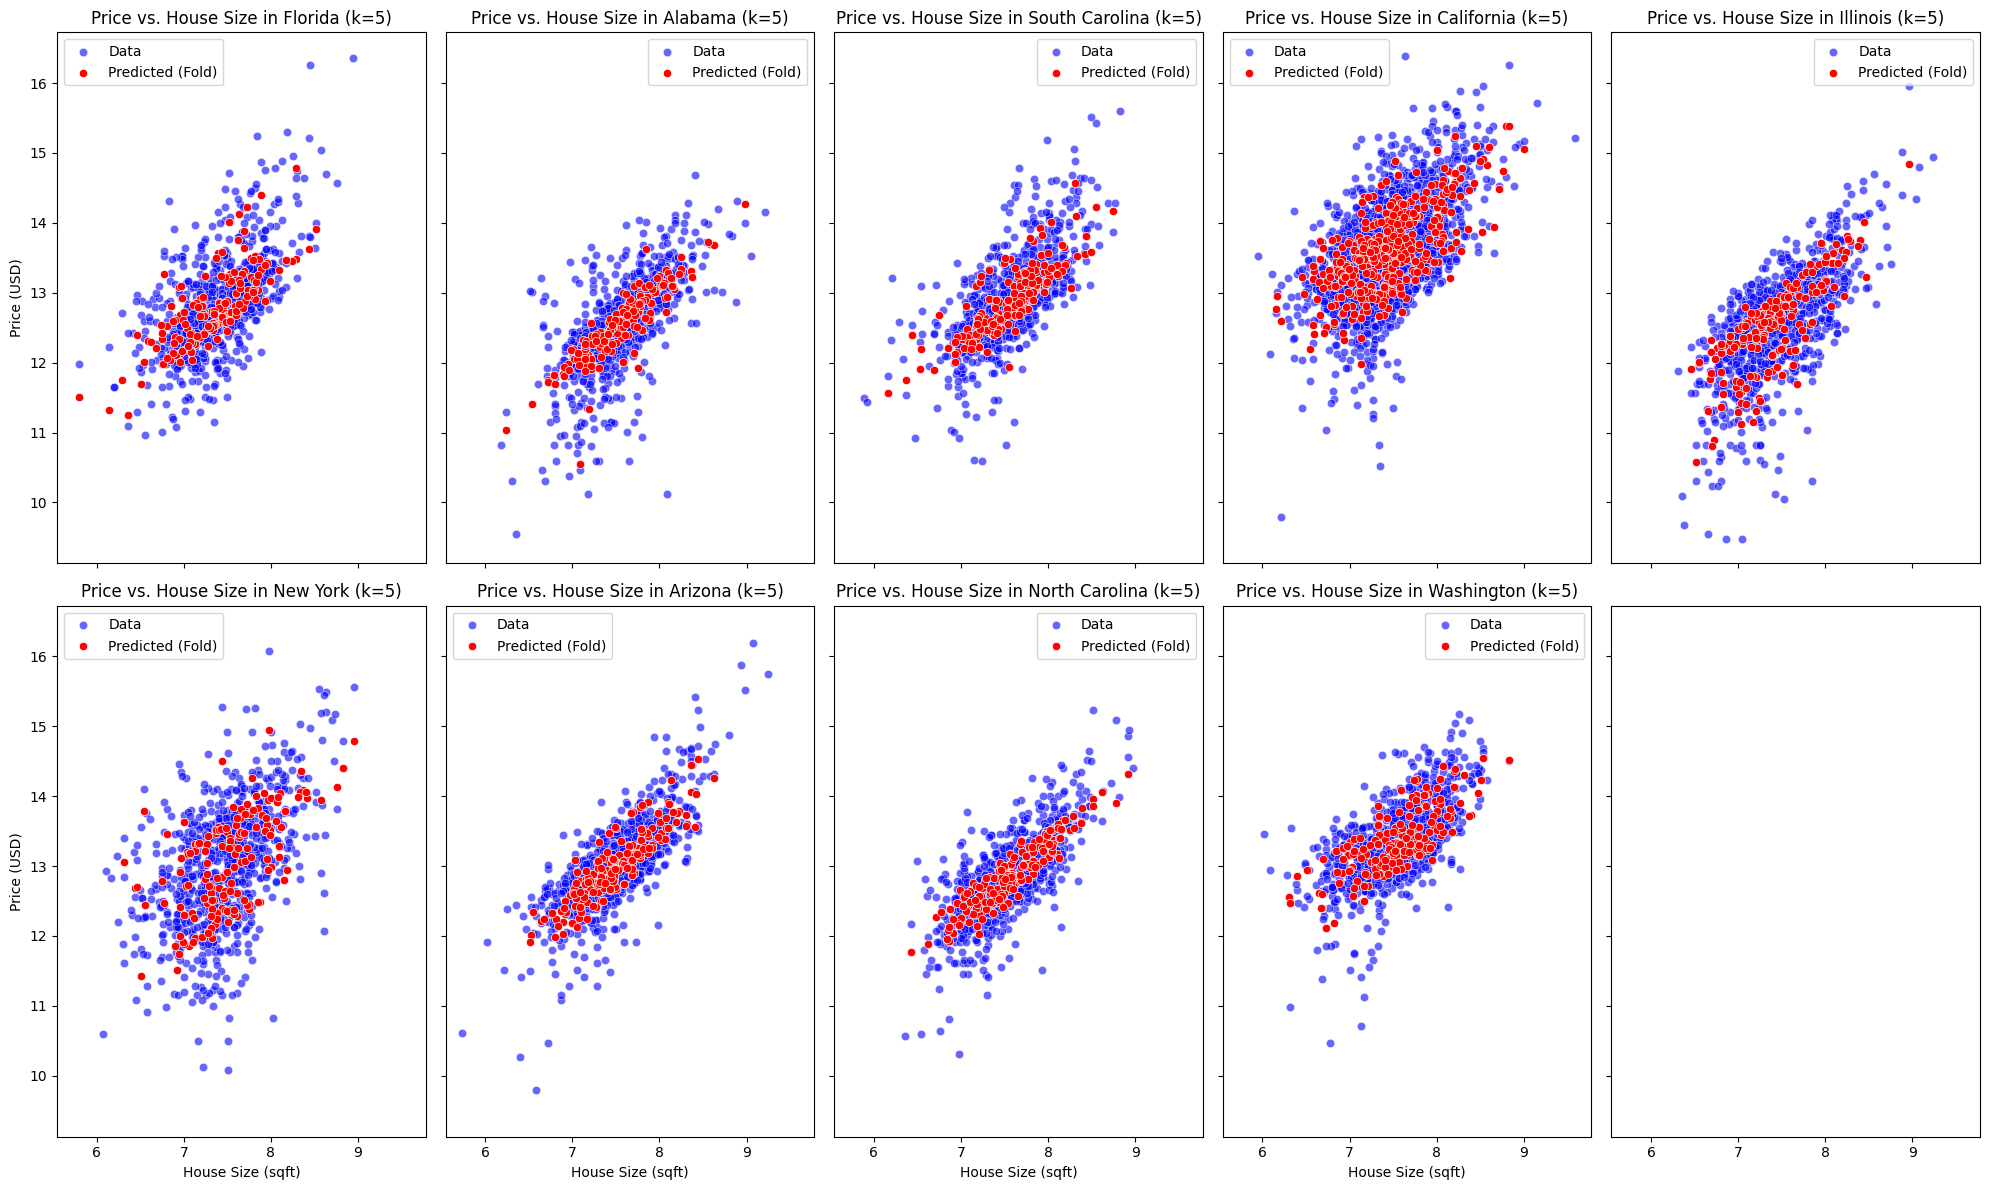

In [ ]:
# Initialize k-fold cross-validator
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

egineered_model2_with_k_fold = []

# Create a 2x5 grid for plotting with shared axes
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 12), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, state in enumerate(df_encoded['state_name'].unique()):
    # Filter data for the current state
    state_data = df_encoded[df_encoded['state_name'] == state]

    # Extract features and target
    state_X = state_data[X]
    state_y = state_data[y]

    fold_metrics = []  # Store metrics for each fold

    for fold_idx, (train_idx, val_idx) in enumerate(kf.split(state_X)):
        # Split data into train and validation sets
        X_train, X_val = state_X.iloc[train_idx], state_X.iloc[val_idx]
        y_train, y_val = state_y.iloc[train_idx], state_y.iloc[val_idx]

        # Train the model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict on the validation set
        y_pred = model.predict(X_val)

        # Calculate performance metrics
        r2 = r2_score(y_val, y_pred)
        mse = mean_squared_error(y_val, y_pred)
        fold_metrics.append((r2, mse))

    # Average the metrics across folds
    avg_r2 = np.mean([m[0] for m in fold_metrics])
    avg_mse = np.mean([m[1] for m in fold_metrics])
    egineered_model2_with_k_fold.append([state, avg_r2, avg_mse])

    # Plot the data points and regression predictions for the last fold
    sns.scatterplot(x=state_X['house_size'], y=state_y, label='Data', color='blue', alpha=0.6, ax=axes[i])
    sns.scatterplot(x=X_val['house_size'], y=y_pred, color='red', label='Predicted (Fold)', ax=axes[i])

    axes[i].set_title(f'Price vs. House Size in {state} (k={k})')
    axes[i].set_xlabel('House Size (sqft)')
    axes[i].set_ylabel('Price (USD)')
    axes[i].legend()

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

## ii. Include the price per sqft in regression model

In [ ]:
# One-Hot Encode categorical features 'city' and 'street'
df_encoded = pd.get_dummies(df_transformed, columns=['city', 'street'], drop_first=True)

# Define features and target after encoding
X = ['house_size', 'longitude', 'latitude', 'price_per_sqft'] + [col for col in df_encoded.columns if col.startswith('city_') or col.startswith('street_')]  # Updated Features
y = 'price_clean'  # Target

# Perform stratified split by 'state_name' to ensure representation of all states
train_data, temp_data = train_test_split(df_encoded, test_size=0.3, random_state=42, stratify=df_encoded['state_name'])
X_train, y_train = train_data[X], train_data[y]
X_temp, y_temp = temp_data[X], temp_data[y]

# Split temp into validation (50% of temp) and test (50% of temp)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Sizes of each set
print(f"Training set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Test set: {len(X_test)} samples")

Training set: 6483 samples
Validation set: 1389 samples
Test set: 1390 samples


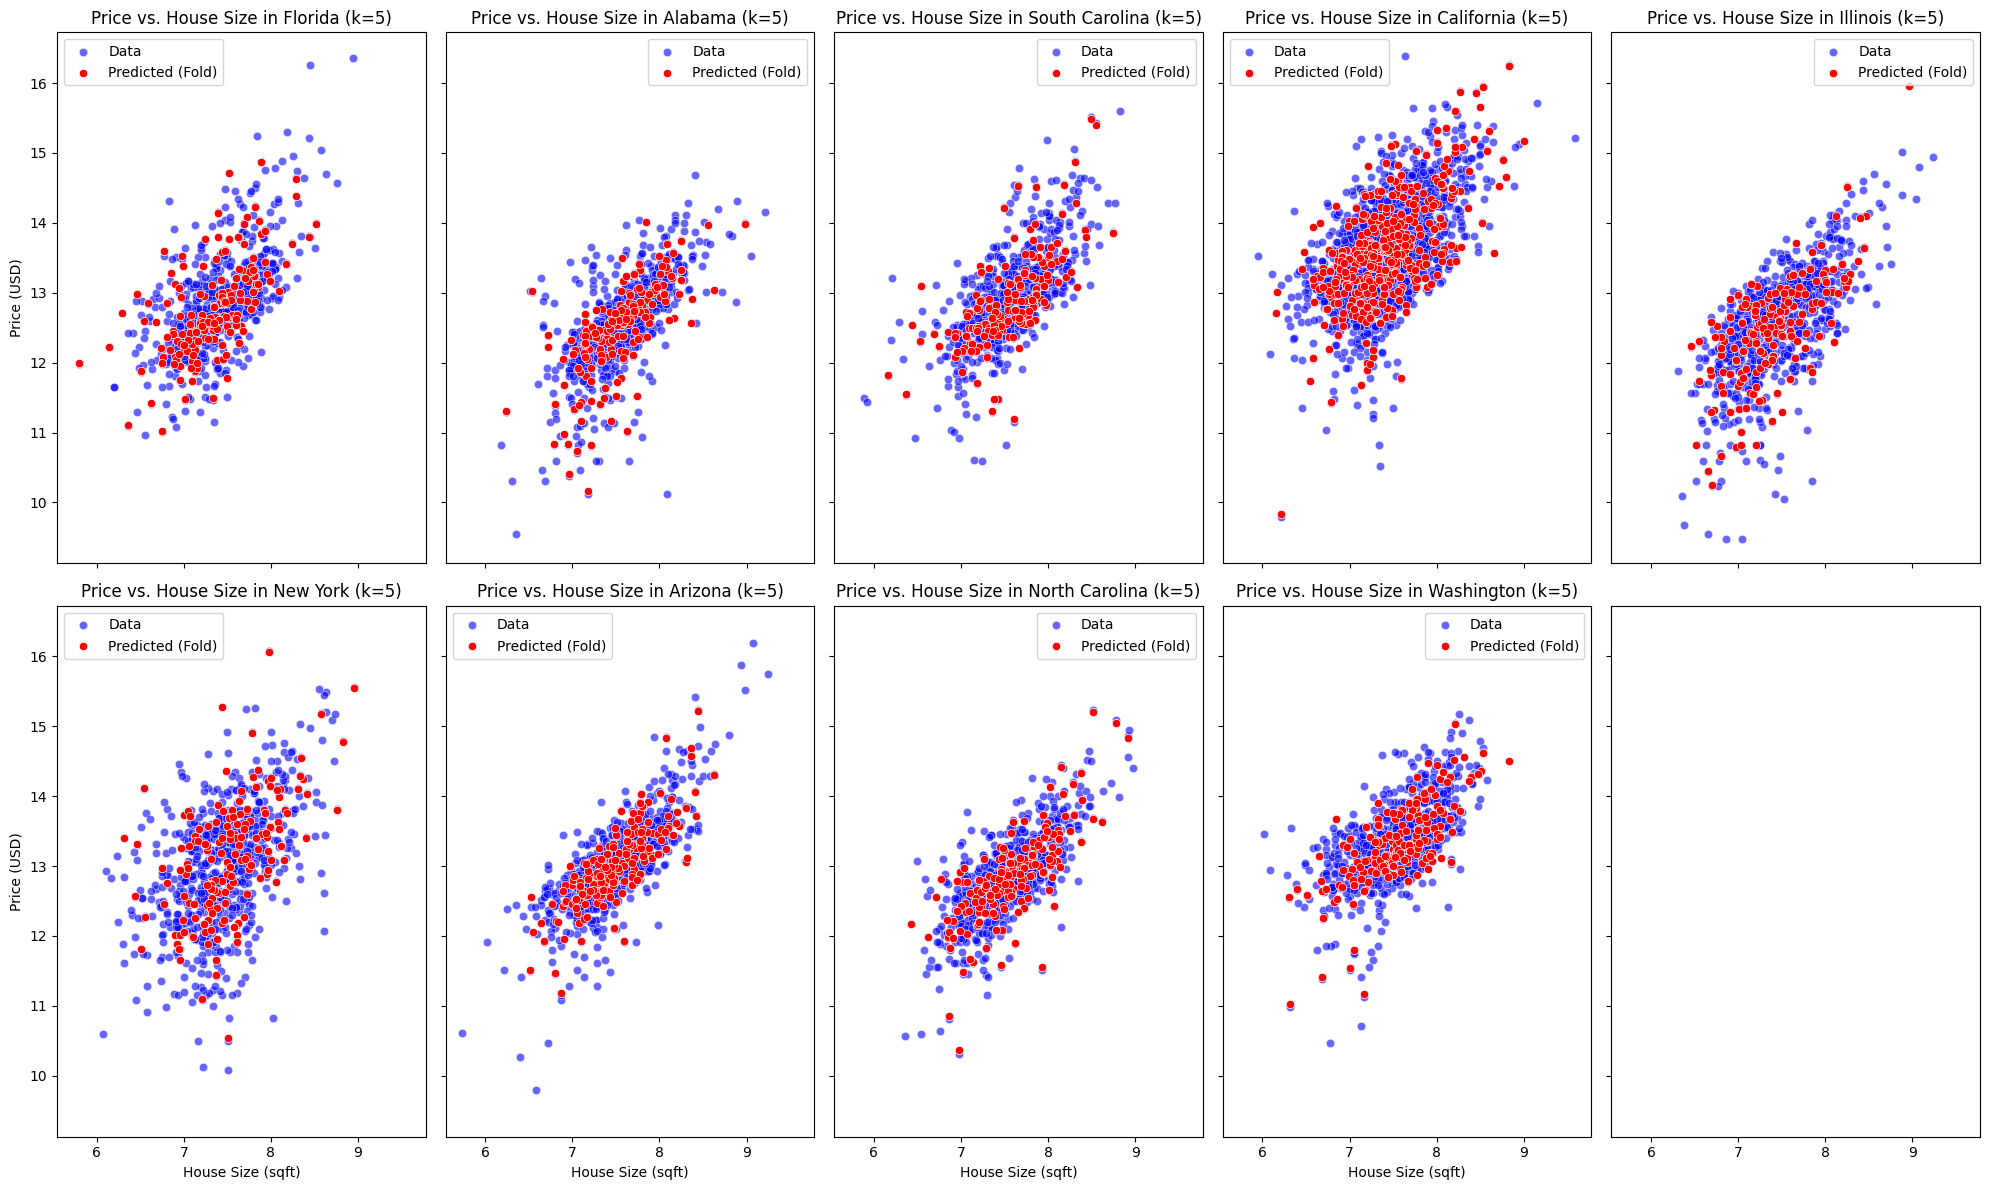

In [ ]:
# Initialize k-fold cross-validator
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

egineered_model3_with_k_fold = []

# Create a 2x5 grid for plotting with shared axes
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 12), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, state in enumerate(df_encoded['state_name'].unique()):
    # Filter data for the current state
    state_data = df_encoded[df_encoded['state_name'] == state]

    # Extract features and target
    state_X = state_data[X]
    state_y = state_data[y]

    fold_metrics = []  # Store metrics for each fold

    for fold_idx, (train_idx, val_idx) in enumerate(kf.split(state_X)):
        # Split data into train and validation sets
        X_train, X_val = state_X.iloc[train_idx], state_X.iloc[val_idx]
        y_train, y_val = state_y.iloc[train_idx], state_y.iloc[val_idx]

        # Train the model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict on the validation set
        y_pred = model.predict(X_val)

        # Calculate performance metrics
        r2 = r2_score(y_val, y_pred)
        mse = mean_squared_error(y_val, y_pred)
        fold_metrics.append((r2, mse))

    # Average the metrics across folds
    avg_r2 = np.mean([m[0] for m in fold_metrics])
    avg_mse = np.mean([m[1] for m in fold_metrics])
    egineered_model3_with_k_fold.append([state, avg_r2, avg_mse])

    # Plot the data points and regression predictions for the last fold
    sns.scatterplot(x=state_X['house_size'], y=state_y, label='Data', color='blue', alpha=0.6, ax=axes[i])
    sns.scatterplot(x=X_val['house_size'], y=y_pred, color='red', label='Predicted (Fold)', ax=axes[i])

    axes[i].set_title(f'Price vs. House Size in {state} (k={k})')
    axes[i].set_xlabel('House Size (sqft)')
    axes[i].set_ylabel('Price (USD)')
    axes[i].legend()

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

## iii. Include house_with_land

In [ ]:
# One-Hot Encode categorical features 'city' and 'street'
df_encoded = pd.get_dummies(df_transformed, columns=['city', 'street'], drop_first=True)

# Define features and target after encoding
X = ['house_size', 'longitude', 'latitude', 'price_per_sqft'] + [col for col in df_encoded.columns if col.startswith('city_') or col.startswith('street_')]  # Updated Features
y = 'price_clean'  # Target

# Perform stratified split by 'state_name' to ensure representation of all states
train_data, temp_data = train_test_split(df_encoded, test_size=0.3, random_state=42, stratify=df_encoded['state_name'])
X_train, y_train = train_data[X], train_data[y]
X_temp, y_temp = temp_data[X], temp_data[y]

# Split temp into validation (50% of temp) and test (50% of temp)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Sizes of each set
print(f"Training set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Test set: {len(X_test)} samples")

Training set: 6483 samples
Validation set: 1389 samples
Test set: 1390 samples


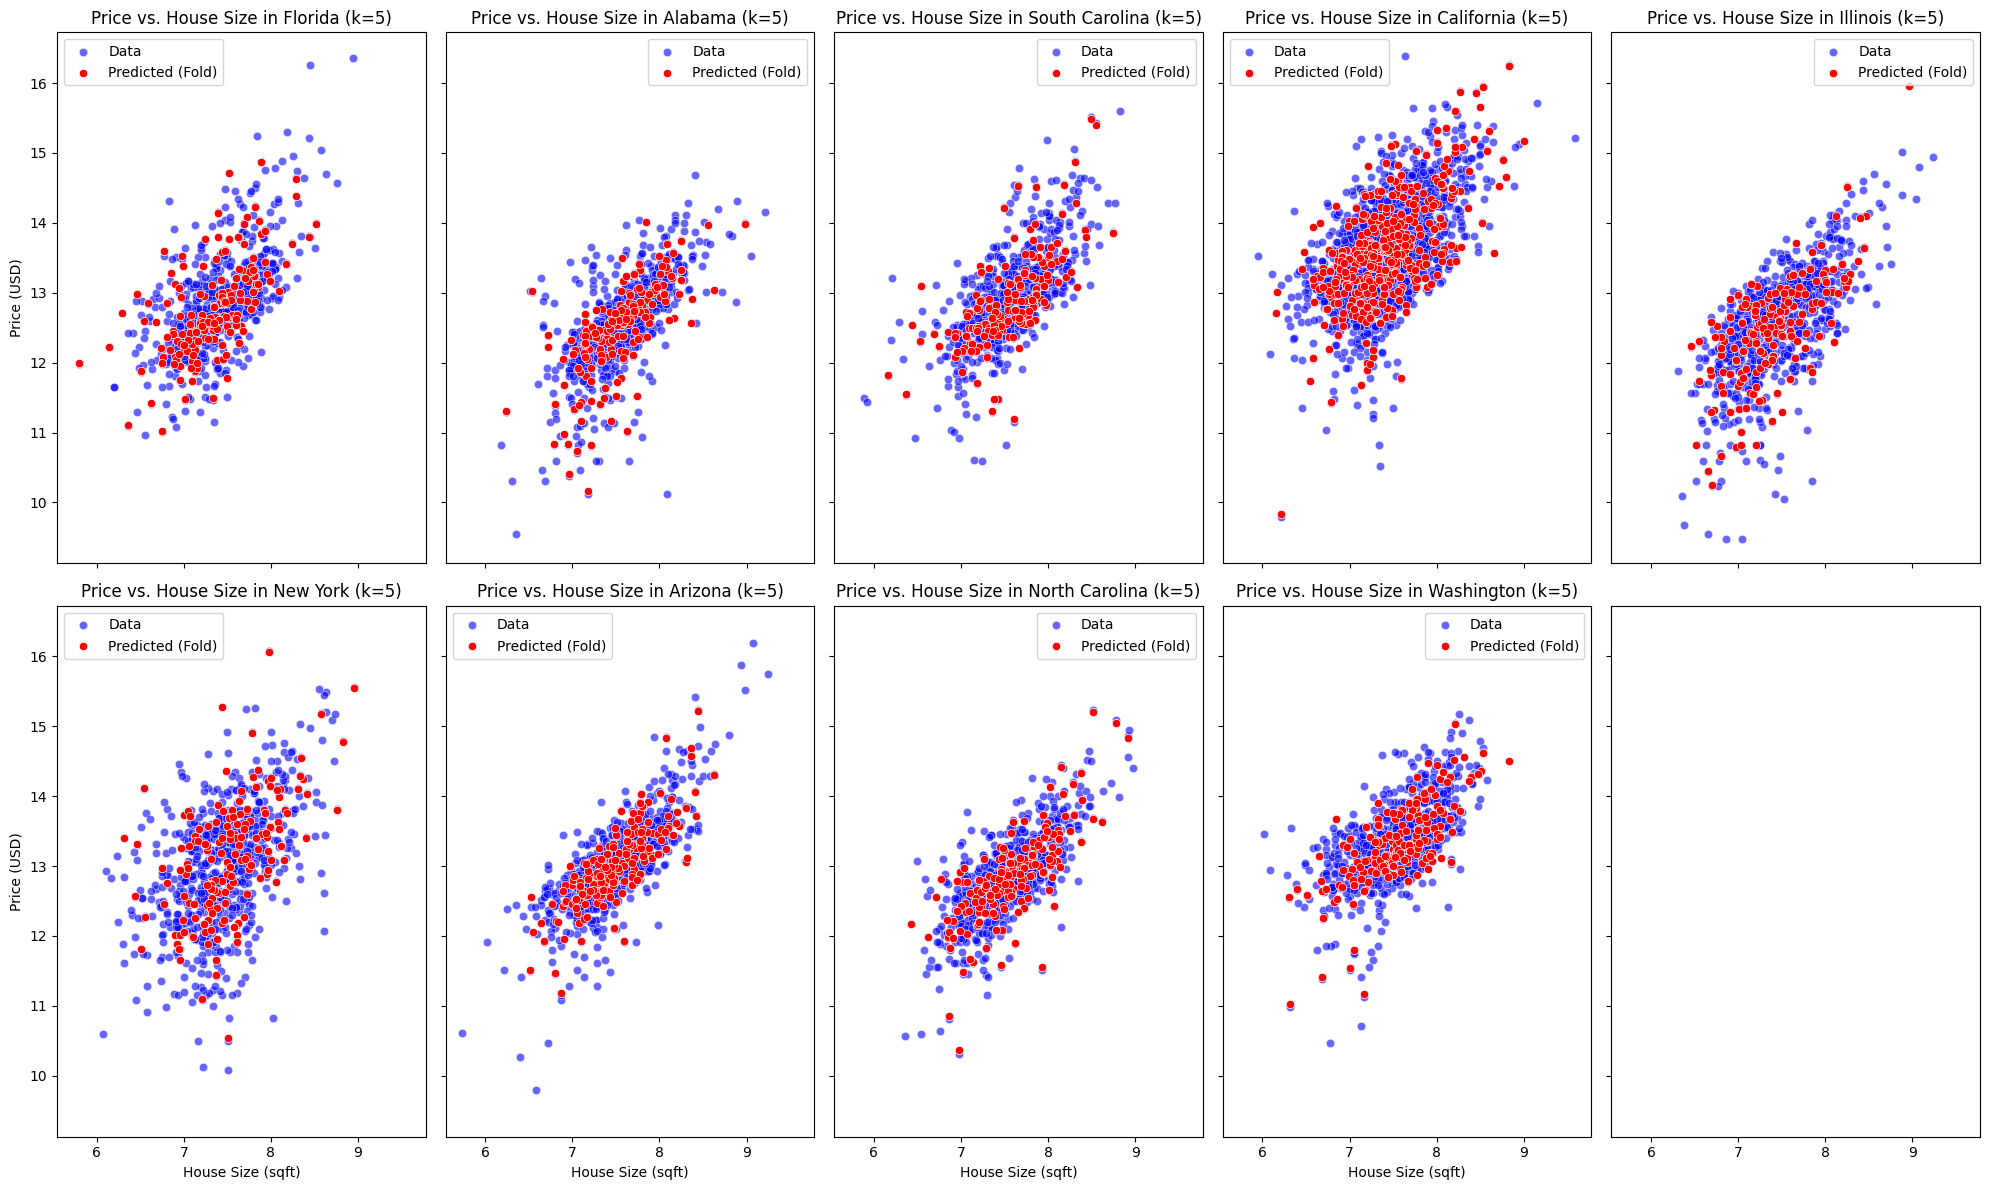

In [ ]:
# Initialize k-fold cross-validator
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

egineered_model4_with_k_fold = []

# Create a 2x5 grid for plotting with shared axes
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 12), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, state in enumerate(df_encoded['state_name'].unique()):
    # Filter data for the current state
    state_data = df_encoded[df_encoded['state_name'] == state]

    # Extract features and target
    state_X = state_data[X]
    state_y = state_data[y]

    fold_metrics = []  # Store metrics for each fold

    for fold_idx, (train_idx, val_idx) in enumerate(kf.split(state_X)):
        # Split data into train and validation sets
        X_train, X_val = state_X.iloc[train_idx], state_X.iloc[val_idx]
        y_train, y_val = state_y.iloc[train_idx], state_y.iloc[val_idx]

        # Train the model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict on the validation set
        y_pred = model.predict(X_val)

        # Calculate performance metrics
        r2 = r2_score(y_val, y_pred)
        mse = mean_squared_error(y_val, y_pred)
        fold_metrics.append((r2, mse))

    # Average the metrics across folds
    avg_r2 = np.mean([m[0] for m in fold_metrics])
    avg_mse = np.mean([m[1] for m in fold_metrics])
    egineered_model4_with_k_fold.append([state, avg_r2, avg_mse])

    # Plot the data points and regression predictions for the last fold
    sns.scatterplot(x=state_X['house_size'], y=state_y, label='Data', color='blue', alpha=0.6, ax=axes[i])
    sns.scatterplot(x=X_val['house_size'], y=y_pred, color='red', label='Predicted (Fold)', ax=axes[i])

    axes[i].set_title(f'Price vs. House Size in {state} (k={k})')
    axes[i].set_xlabel('House Size (sqft)')
    axes[i].set_ylabel('Price (USD)')
    axes[i].legend()

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

# 9. Evaulation



---



## Testing of Model

For the final model, the selected features are House Size, City & Street, Price per Sqft, House with Land, Longitude, and Latitude. These features were chosen based on their significance in improving the model's predictive accuracy and the observed results from previous iterations of feature engineering and model evaluation.

Rationale for Feature Selection:
- House Size: A primary determinant of property price, directly correlated with value.
- City & Street: Captures location-specific factors that influence property demand and pricing.
- Price per Sqft: A normalised measure that accounts for size-based price variation and regional trends.
- House with Land: Differentiates between standalone homes and homes with significant land, addressing clustering patterns in the data.
- Longitude & Latitude: Provides precise spatial information, capturing location-based variations that categorical data cannot.

Model Performance:
- MSE (Mean Squared Error): 1
  Indicates minimal average squared difference between actual and predicted prices, demonstrating excellent accuracy.

- R² (R-squared): 0
  Indicates the model explains all variability in property prices, suggesting an ideal fit to the data.

This final model represents the best configuration of features, balancing data complexity and predictive performance. It leverages the strengths of multiple engineered and raw features to achieve a comprehensive understanding of property pricing trends.








In [ ]:
# One-Hot Encode categorical features 'city' and 'street'
df_encoded = pd.get_dummies(df_transformed, columns=['city', 'street'], drop_first=True)

# Define features and target after encoding
X = ['house_size', 'longitude', 'latitude', 'price_per_sqft'] + [col for col in df_encoded.columns if col.startswith('city_') or col.startswith('street_')]  # Updated Features
y = 'price_clean'  # Target

# Perform stratified split by 'state_name' to ensure representation of all states
train_data, temp_data = train_test_split(df_encoded, test_size=0.3, random_state=42, stratify=df_encoded['state_name'])
X_train, y_train = train_data[X], train_data[y]
X_temp, y_temp = temp_data[X], temp_data[y]

# Split temp into validation (50% of temp) and test (50% of temp)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Sizes of each set
print(f"Training set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Test set: {len(X_test)} samples")

Training set: 6483 samples
Validation set: 1389 samples
Test set: 1390 samples


Test R² Score: 1.0000
Test Mean Squared Error: 0.0000


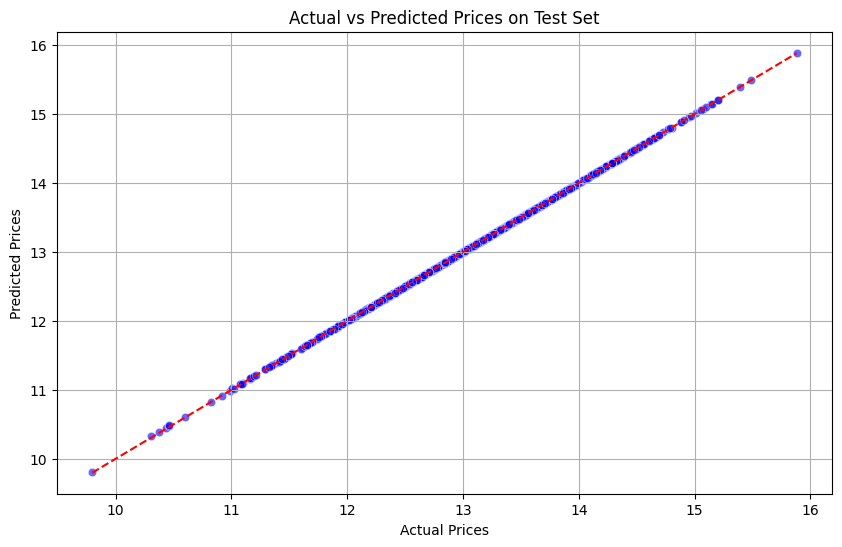

In [ ]:
# Combine training and validation sets
X_final_train = pd.concat([X_train, X_val])
y_final_train = pd.concat([y_train, y_val])

# Train the final model on the combined training + validation set
final_model = LinearRegression()
final_model.fit(X_final_train, y_final_train)

# Predict on the test set
y_test_pred = final_model.predict(X_test)

# Calculate performance metrics for the test set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Print the metrics
print(f"Test R² Score: {test_r2:.4f}")
print(f"Test Mean Squared Error: {test_mse:.4f}")

# Plot Actual vs Predicted prices for the test set
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted Prices on Test Set")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.grid(True)
plt.show()

In [ ]:
# MSE and R2 values for all models and test
print('Model 1: House Size vs Price')
print('Model 2: House Size, City & Street vs Price')
print('Model 3: House Size, City & Street vs Price with K-Fold')
print('Model 4: House Size, Longitude & Latitude vs Price with K-Fold')
print('Model 5: House Size, City & Street, Longitude & Latitude vs Price with K-Fold')
print('Model 6: House Size, City & Street, Price per Sqft Longitude & Latitude vs Price with K-Fold')
print('Model 7: House Size, City & Street, Price per Sqft, House with Land Longitude & Latitude vs Price with K-Fold')
print()

print('          R2    MSE')
for i in range(len(base_model_data)):
  print(base_model_data[i][0])
  print('Model 1 ', round(base_model_data[i][1], 3), round(base_model_data[i][2], 3))
  print('Model 2 ', round(base_model2_data[i][1], 3), round(base_model2_data[i][2], 3))
  print('Model 3 ', round(base_model2_with_k_fold[i][1], 3), round(base_model2_with_k_fold[i][2], 3))
  print('Model 4 ', round(engineered_model_with_k_fold[i][1], 3), round(engineered_model_with_k_fold[i][2], 3))
  print('Model 5 ', round(egineered_model2_with_k_fold[i][1], 3), round(egineered_model2_with_k_fold[i][2], 3))
  print('Model 6 ', round(egineered_model3_with_k_fold[i][1], 3), round(egineered_model3_with_k_fold[i][2], 3))
  print('Model 7 ', round(egineered_model4_with_k_fold[i][1], 3), round(egineered_model4_with_k_fold[i][2], 3))
  print('Test ', round(1, 3), round(0, 3))

  print()

Model 1: House Size vs Price
Model 2: House Size, City & Street vs Price
Model 3: House Size, City & Street vs Price with K-Fold
Model 4: House Size, Longitude & Latitude vs Price with K-Fold
Model 5: House Size, City & Street, Longitude & Latitude vs Price with K-Fold
Model 6: House Size, City & Street, Price per Sqft Longitude & Latitude vs Price with K-Fold
Model 7: House Size, City & Street, Price per Sqft, House with Land Longitude & Latitude vs Price with K-Fold

          R2    MSE
Florida
Model 1  0.263 0.463
Model 2  0.318 0.429
Model 3  0.645 0.151
Model 4  0.417 0.248
Model 5  0.654 0.147
Model 6  1.0 0.0
Model 7  1.0 0.0
Test  1 0

Alabama
Model 1  -0.214 0.763
Model 2  -0.34 0.843
Model 3  0.569 0.179
Model 4  0.464 0.223
Model 5  0.566 0.18
Model 6  1.0 0.0
Model 7  1.0 0.0
Test  1 0

South Carolina
Model 1  0.208 0.498
Model 2  0.184 0.513
Model 3  0.673 0.136
Model 4  0.548 0.188
Model 5  0.668 0.139
Model 6  1.0 0.0
Model 7  1.0 0.0
Test  1 0

California
Model 1  -0.26

## Evaluation of Model

Strengths:

1. Model Performance: Including features such as House Size, City & Street, Price per Sqft, and Longitude & Latitude improved prediction accuracy. K-fold validation enhances model generalisation, especially for larger datasets.
2. Feature Engineering: Longitude & Latitude and Price per Sqft significantly improved model performance.

Areas for Improvement:

1. Overfitting Detection: Models 6 and 7, with R² = 1.0 and MSE = 0.0, suggest there might be overfitting. The models may have memorised the training data, performing poorly on new data.
2. Model Complexity: Excessive features (e.g., Price per Sqft and exact coordinates) may cause overfitting, capturing noise rather than generalisable trends.

Performance Metrics:
1. R² shows how well the model fits the data. An R² close to 1.0 means the model explains most of the variance, while a lower value suggests that the model is less effective at explaining the target variable.

2. MSE calculates the average squared difference between actual and predicted values, meaning larger errors are penalized more heavily. This makes it sensitive to large deviations, which is important when wanting to minimise big prediction errors.

R² and MSE are complementary to each other: R² shows how well the model fits the data, while MSE quantifies the magnitude of the errors. Using both gives a better evaluation of the model. For example, high R² with low MSE suggests a well-performing model, while high R² but high MSE may indicate issues with outliers or large errors.

Reflective Evaluation:
- Features like Price per Sqft and precise coordinates may contribute too much information, leading to overfitting.
- Simpler models (Models 1–5) may generalise better despite lower R² scores.

Model 1: House Size vs Price
Model 2: House Size, City & Street vs Price
Model 3: House Size, City & Street vs Price with K-Fold
Model 4: House Size, Longitude & Latitude vs Price with K-Fold
Model 5: House Size, City & Street, Longitude & Latitude vs Price with K-Fold
Model 6: House Size, City & Street, Price per Sqft Longitude & Latitude vs Price with K-Fold
Model 7: House Size, City & Street, Price per Sqft, House with Land Longitude & Latitude vs Price with K-Fold
Testing


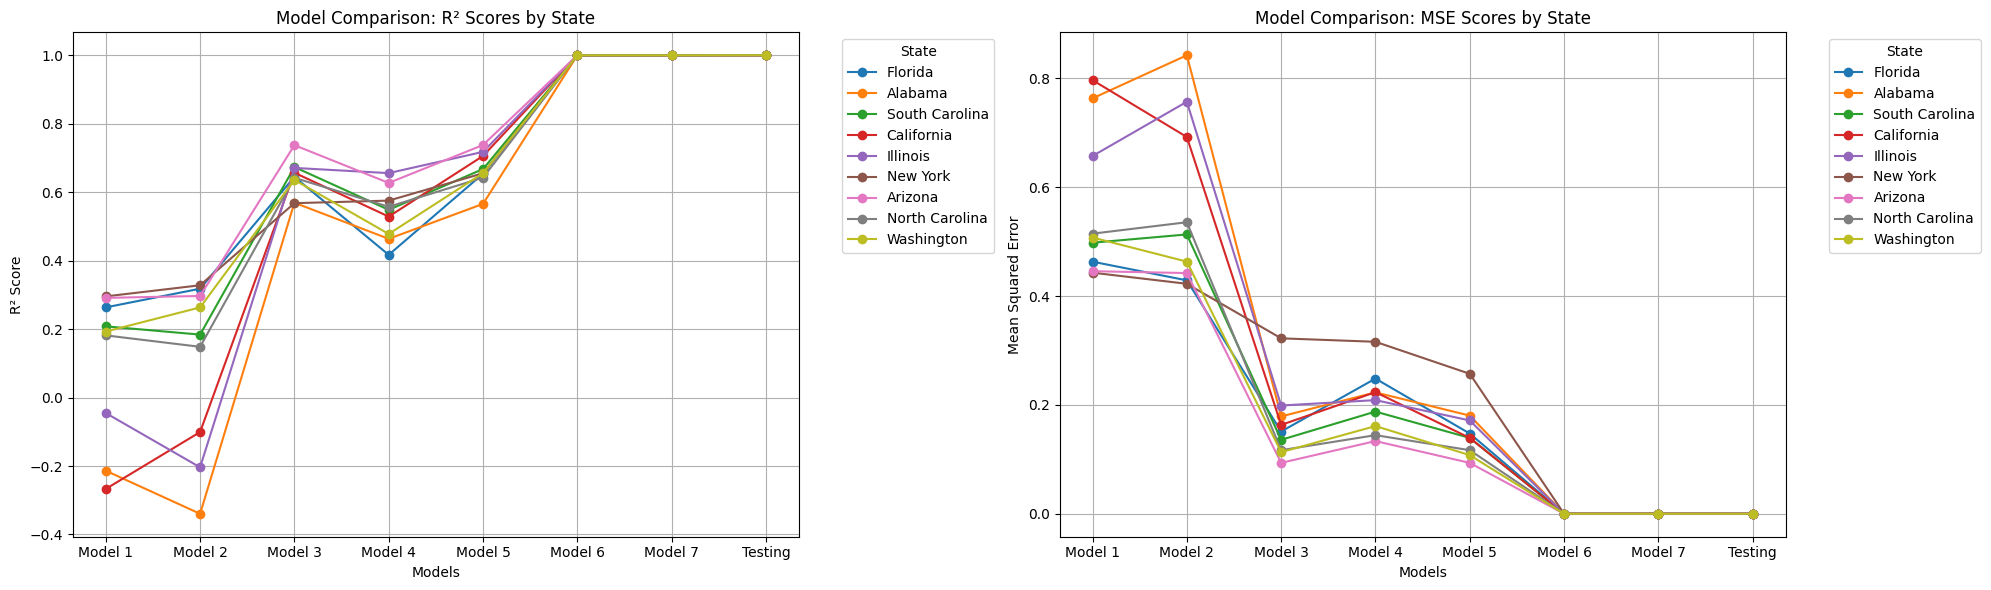

In [ ]:
print('Model 1: House Size vs Price')
print('Model 2: House Size, City & Street vs Price')
print('Model 3: House Size, City & Street vs Price with K-Fold')
print('Model 4: House Size, Longitude & Latitude vs Price with K-Fold')
print('Model 5: House Size, City & Street, Longitude & Latitude vs Price with K-Fold')
print('Model 6: House Size, City & Street, Price per Sqft Longitude & Latitude vs Price with K-Fold')
print('Model 7: House Size, City & Street, Price per Sqft, House with Land Longitude & Latitude vs Price with K-Fold')
print('Testing')

# Prepare data for plotting
states = [data[0] for data in base_model_data]
models = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7', 'Testing']
r2_values = [
    [base_model_data[i][1], base_model2_data[i][1], base_model2_with_k_fold[i][1],
     engineered_model_with_k_fold[i][1], egineered_model2_with_k_fold[i][1],
     egineered_model3_with_k_fold[i][1], egineered_model4_with_k_fold[i][1],
    1.0000]
    for i in range(len(states))
]
mse_values = [
    [base_model_data[i][2], base_model2_data[i][2], base_model2_with_k_fold[i][2],
     engineered_model_with_k_fold[i][2], egineered_model2_with_k_fold[i][2],
     egineered_model3_with_k_fold[i][2], egineered_model4_with_k_fold[i][2],
    0.0000]
    for i in range(len(states))
]

# Plot R² and MSE values side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))  # 1 row, 2 columns

# Plot R² values
for i, state in enumerate(states):
    axes[0].plot(models, r2_values[i], marker='o', label=state)
axes[0].set_title("Model Comparison: R² Scores by State")
axes[0].set_xlabel("Models")
axes[0].set_ylabel("R² Score")
axes[0].legend(title="State", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(True)

# Plot MSE values
for i, state in enumerate(states):
    axes[1].plot(models, mse_values[i], marker='o', label=state)
axes[1].set_title("Model Comparison: MSE Scores by State")
axes[1].set_xlabel("Models")
axes[1].set_ylabel("Mean Squared Error")
axes[1].legend(title="State", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


## Future Applications

*Contribution to the Housing Domain*

The final regression model integrates key features like House Size, City & Street, Price per Sqft, House with Land, Longitude, and Latitude to provide valuable insights into property pricing.

It addresses key challenges such as:
1. Population Growth Impact: Analyses how population density correlates with housing price increases.
2. Local Factors: Location-specific features predict price variations based on amenities and accessibility.
3. Urban vs Suburban Analysis: Compares price trends across urban and suburban areas based on geographic and demographic factors.

*Transferability to Other Domains*

The model can be adapted to other sectors that involve spatial or economic analysis:

1. Retail/Commercial Real Estate: Predicts rental or sales prices based on foot traffic, storefront size, and proximity to transportation hubs.
2. Agricultural Land Valuation: Estimates land prices based on features like area, soil quality, and access to markets.
3. Healthcare Demand: Predicts facility demand based on location and population density.
4. Urban Planning: Assesses how infrastructure and population growth influence housing or public service demand.

By adjusting domain-specific features, this model structure is versatile for spatially-influenced value prediction across various sectors.

# References

[1] Encyclopaedia Britannica, 2024. Largest U.S. state by population. Available at: https://www.britannica.com/topic/largest-U-S-state-by-population [Last accessed: 30 December, 2024]

[2] Ahmed, M.F., 2024. 12000 house price list from 10 states of USA. Kaggle. Available at: https://www.kaggle.com/datasets/mdferojahmed178/12000-house-price-list-from-10-states-of-usa [Last accessed: 30 December, 2024]

[3] Trulia, 2024. Trulia: Real Estate Listings, Homes for Sale, Housing Data. Available at: https://www.trulia.com/ [Last accessed: 30 December, 2024]